<a href="https://colab.research.google.com/github/xvymaz12/ADAML/blob/main/ADAML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BM20A6100 Project work wind turbine failure
# Emma Hirvonen, Helmi Toropainen, Jan Vymazal

# Data summary and visualisation

import pandas as pd

# load data for all turbines
WT2 = pd.read_excel('/content/sample_data/data.xlsx', 'No.2WT')
WT39 = pd.read_excel('/content/sample_data/data.xlsx', 'No.39WT')
WT14 = pd.read_excel('/content/sample_data/data.xlsx', 'No.14WT')
WT3 = pd.read_excel('/content/sample_data/data.xlsx', 'No.3')

# check for missing data
turbines = [WT2, WT39, WT14, WT3]
for turbine in turbines:
  missing_values = turbine.isnull().sum()
  record_count = len(turbine)
  means = turbine.mean()
  print(f"Number of missing values{missing_values}")
  print(f"Number of records {record_count}")
  print(means)


Number of missing values1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64
Number of records 1570
1    -7.436307e-03
2    -1.161701e-02
3     2.631161e+01
4     2.928029e+01
5     3.153096e+02
6     4.104364e+01
7     4.090625e+01
8     4.107984e+01
9     2.357483e+07
10    3.206220e+02
11    1.320342e+03
12    1.750000e+03
13    1.104584e-02
14   -7.541401e-01
15    8.490000e+02
16    2.236841e+02
17    9.043332e+00
18    6.850910e+02
19    5.000232e+01
20    1.762321e+01
21    2.291181e+01
22    1.073565e+01
23    5.164274e+00
24    5.479762e+00
25    1.692277e+01
26    5.321139e+01
27    5.982228e+01
28    6.062561e+01
dtype: float64
Number of missing values1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
1

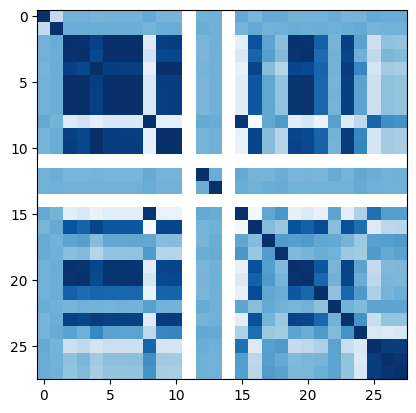

In [ ]:
import matplotlib.pyplot as plt

# correlations between variables for turbine 2
corr_matrix_2 = WT2.corr()
plt.imshow(corr_matrix_2, cmap='Blues')

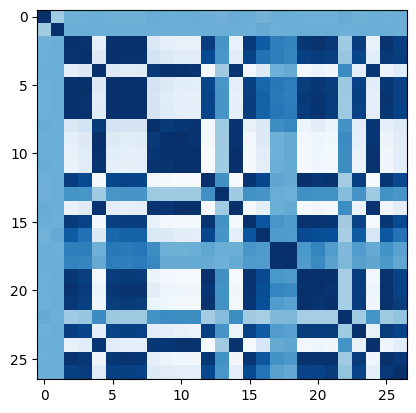

In [ ]:
# correlations between variables for turbine 39
corr_matrix_39 = WT39.corr()
plt.imshow(corr_matrix_39, cmap='Blues')

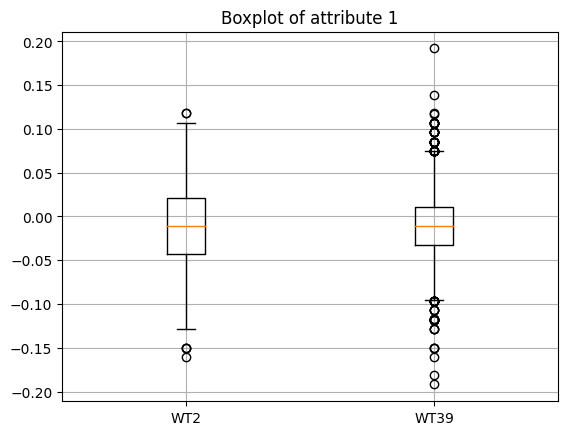

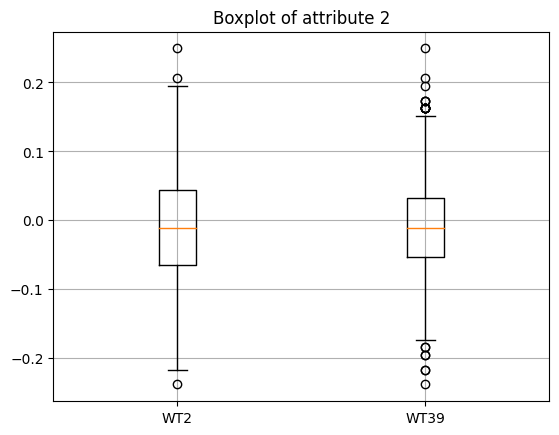

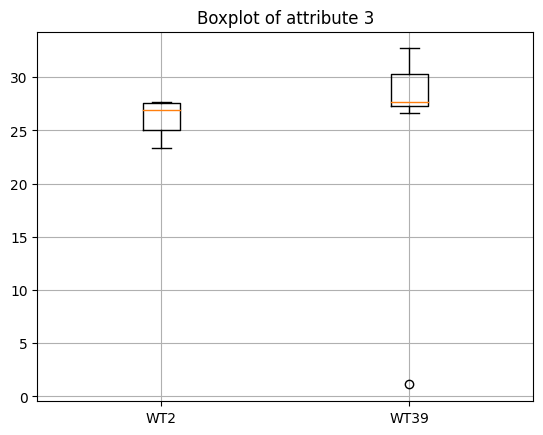

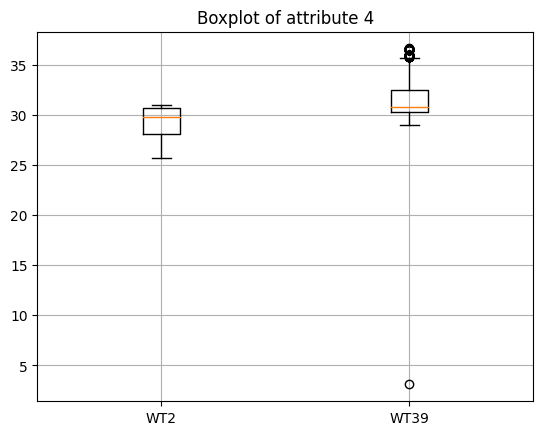

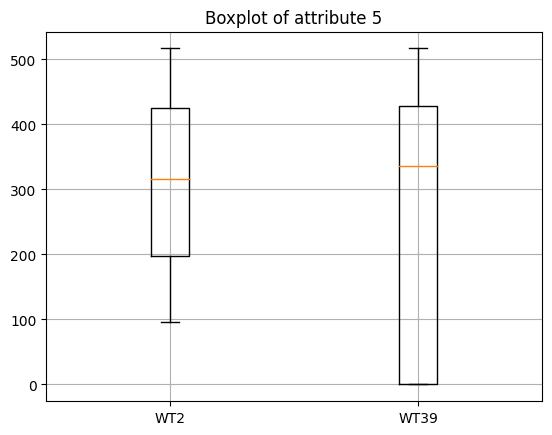

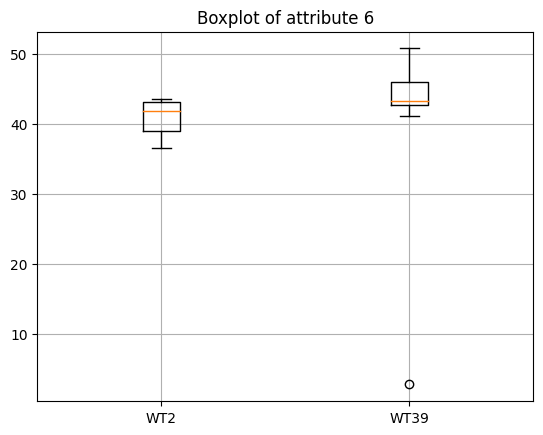

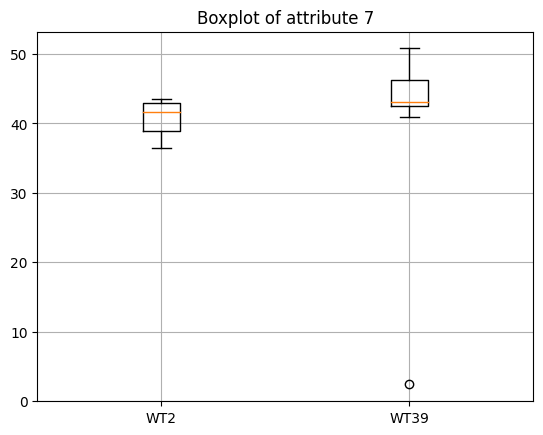

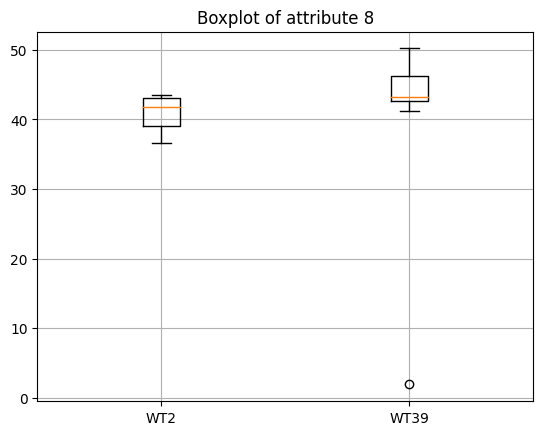

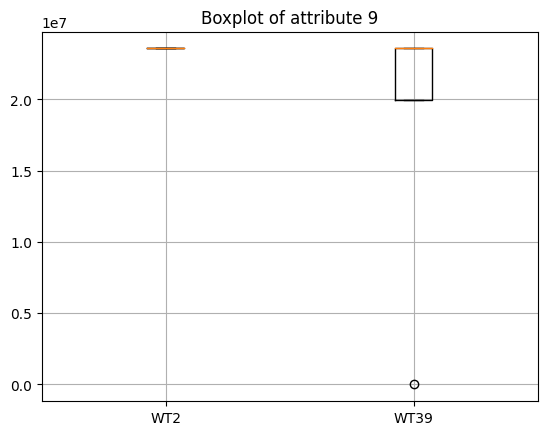

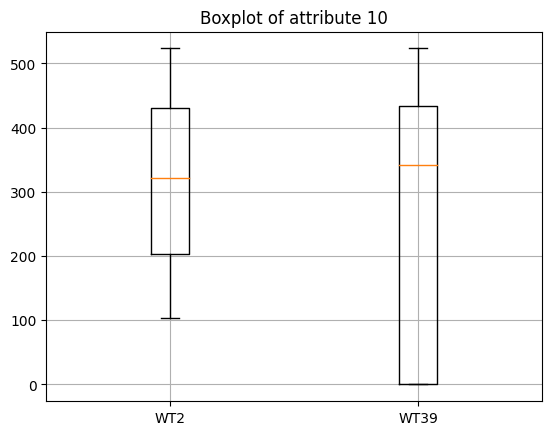

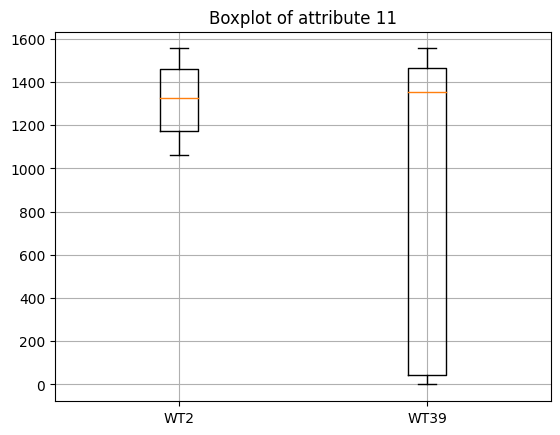

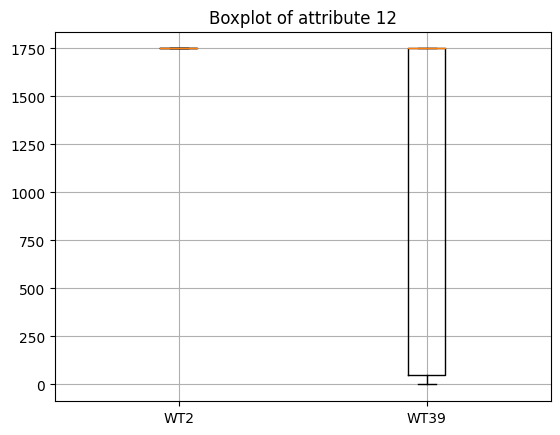

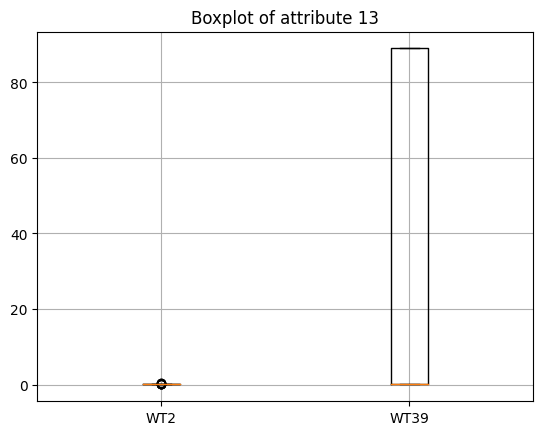

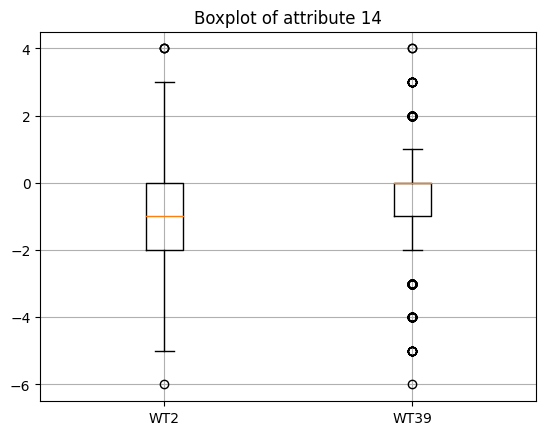

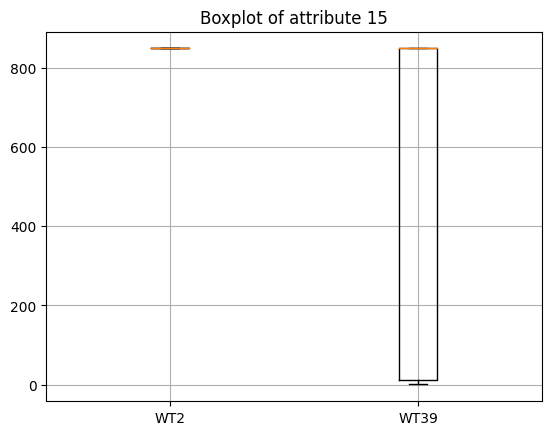

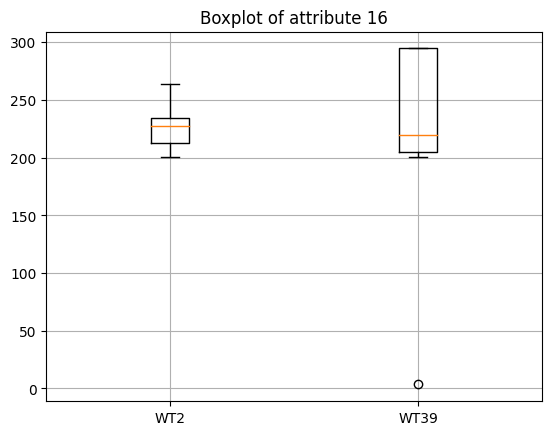

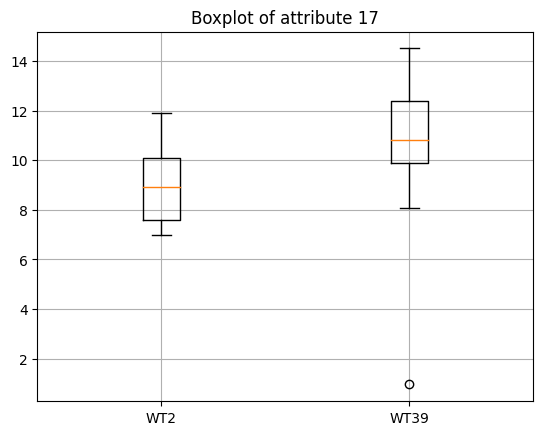

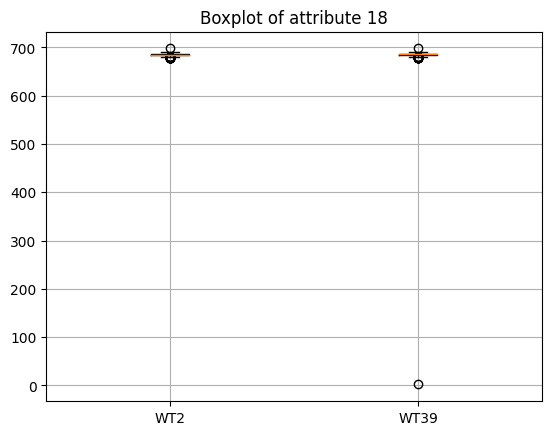

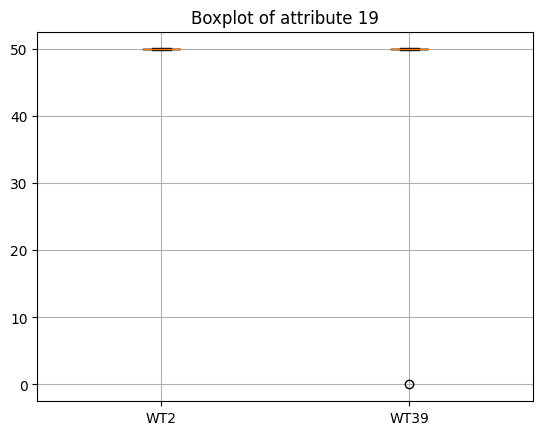

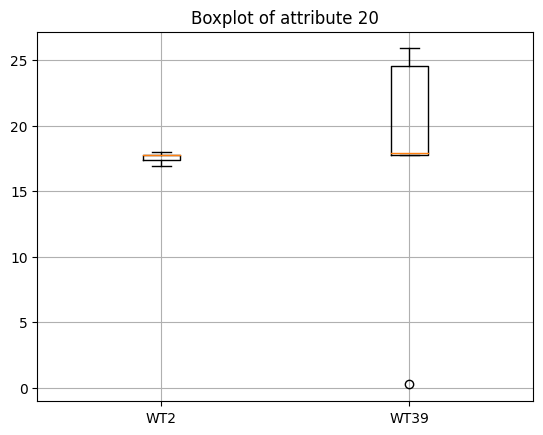

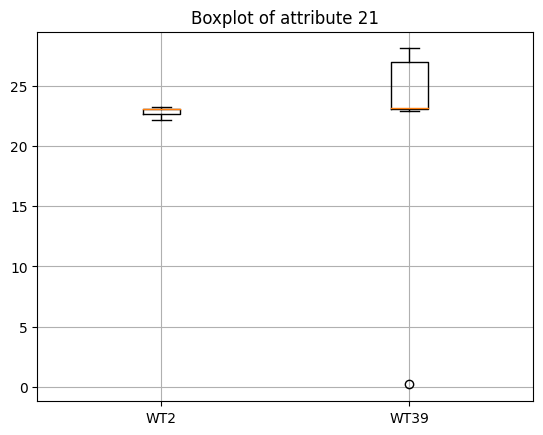

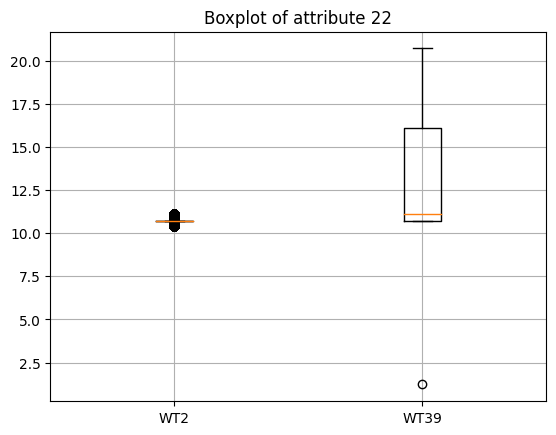

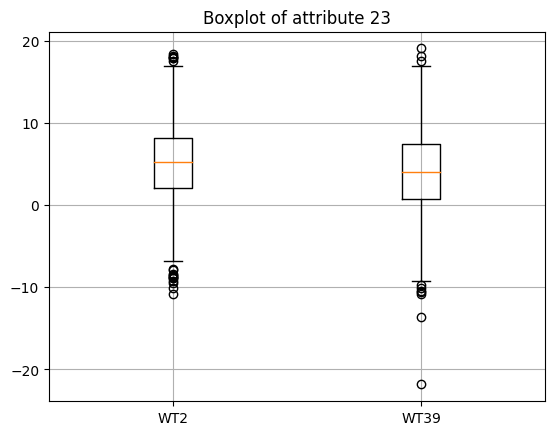

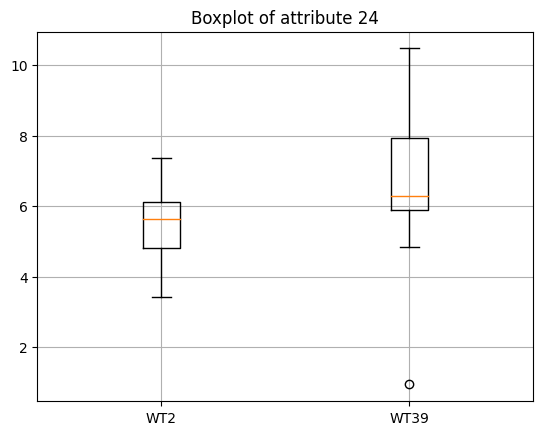

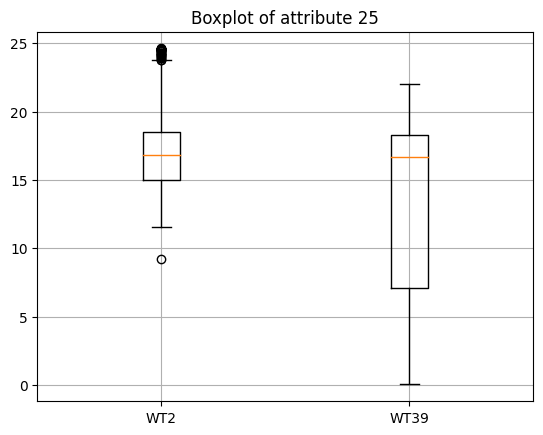

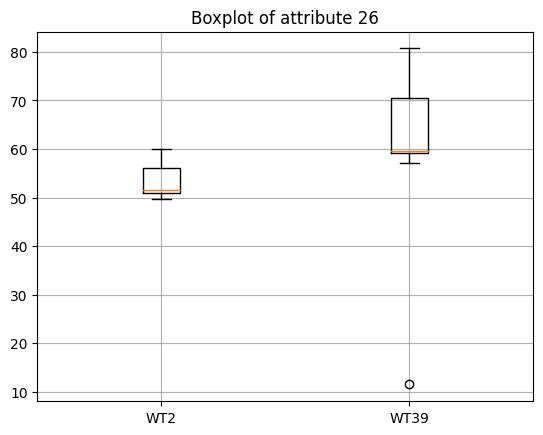

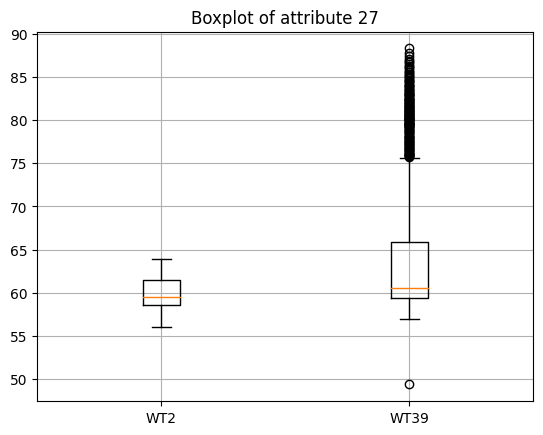

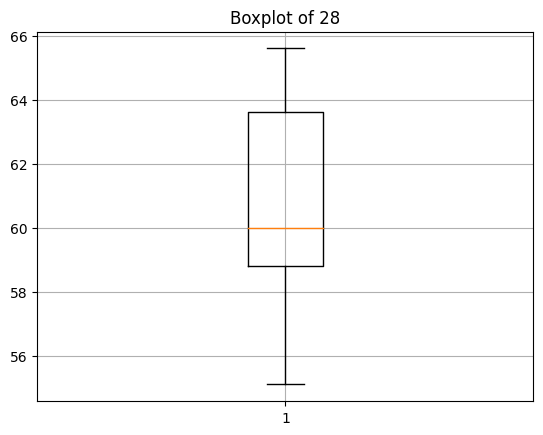

In [ ]:
# boxplots for all variables
for column in WT39.columns:
  plt.figure()
  plt.boxplot([WT2[column],WT39[column]], labels=["WT2", "WT39"])
  plt.title(f'Boxplot of attribute {column}')
  plt.grid(True)
  plt.show()

plt.figure()
plt.boxplot(WT2[28])
plt.title(f"Boxplot of 28")
plt.grid(True)
plt.show()

# chosen variables to look into: 5, 11, 12, 15, 18, 27

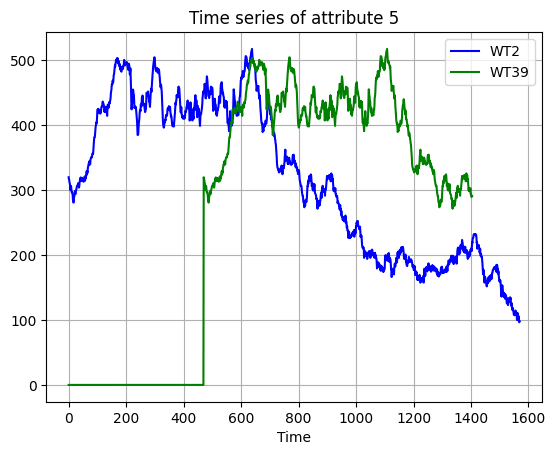

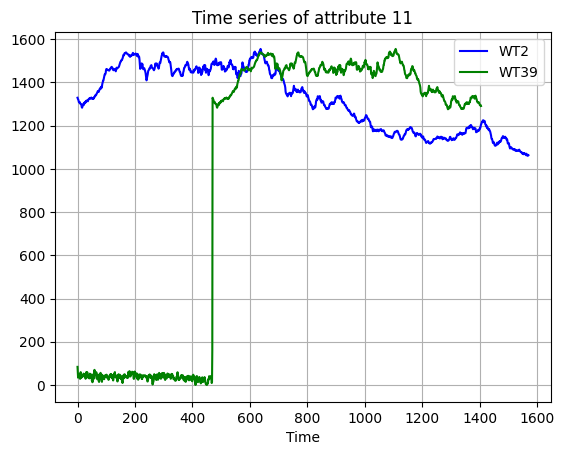

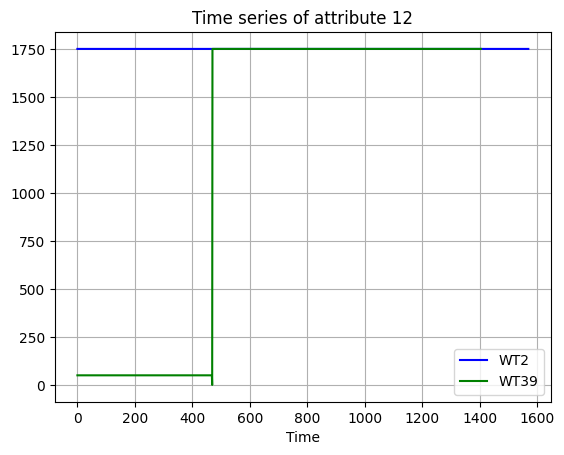

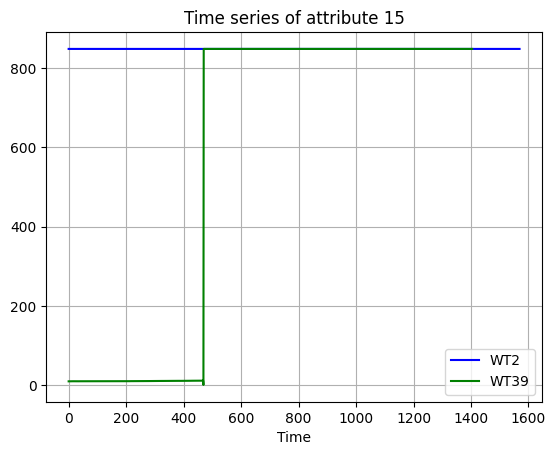

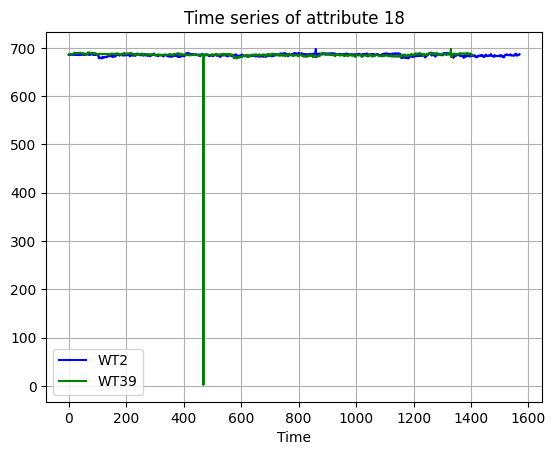

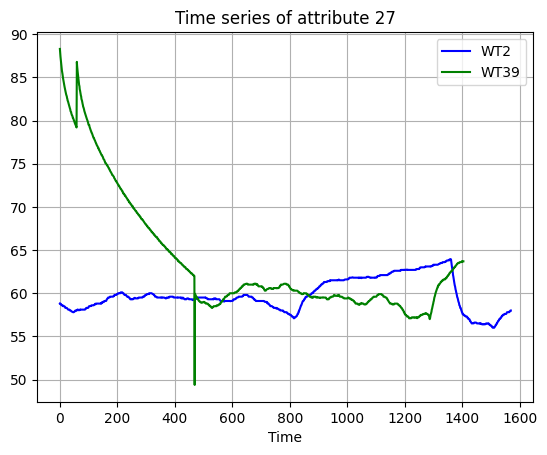

In [ ]:
# plot time series data for chosen variables
picked_columns = [5, 11, 12, 15, 18, 27]
for col in picked_columns:
  plt.figure()
  plt.plot(WT2.iloc[:, col-1], label="WT2", color='blue')
  plt.plot(WT39.iloc[:, col-1], label="WT39", color='green')
  plt.title(f"Time series of attribute {col}")
  plt.xlabel("Time")
  plt.legend()
  plt.grid(True)



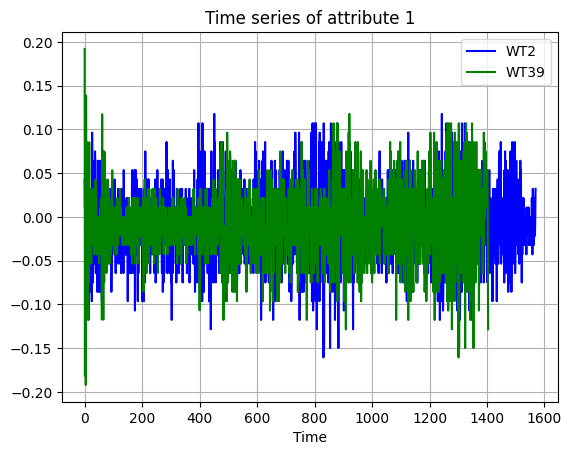

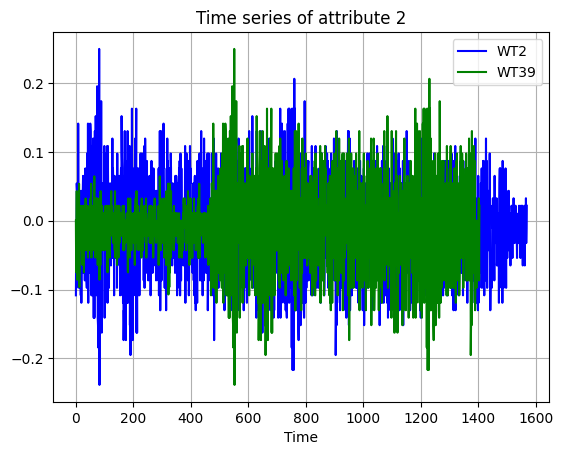

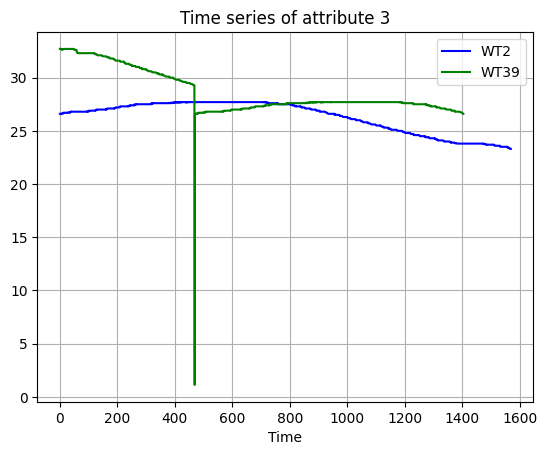

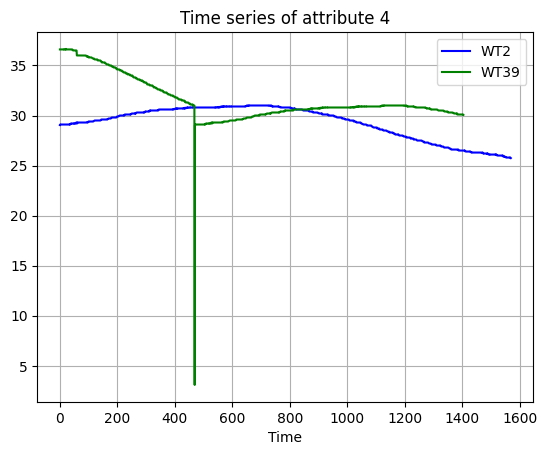

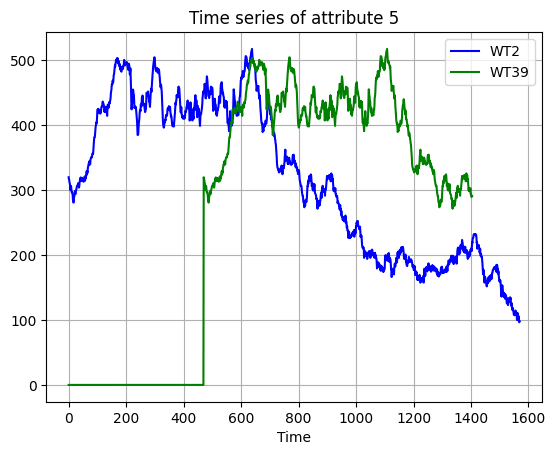

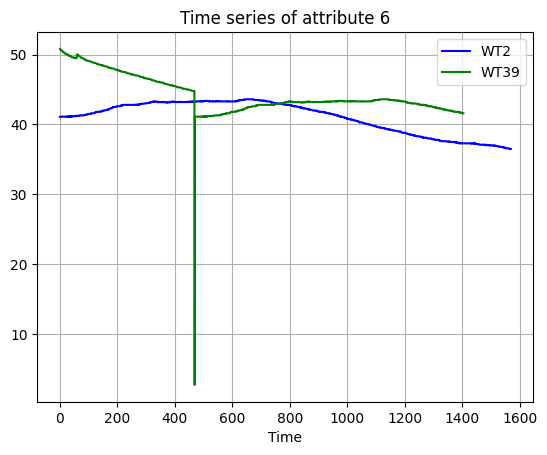

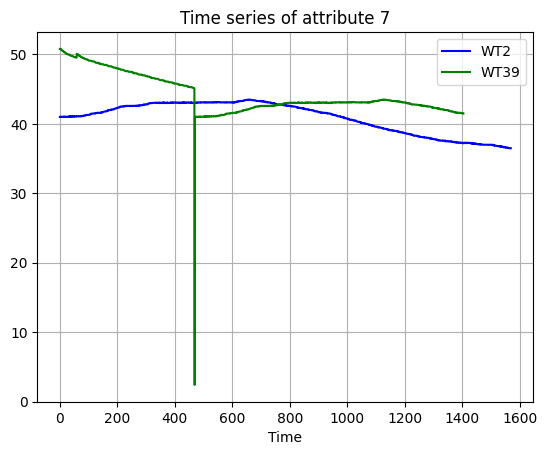

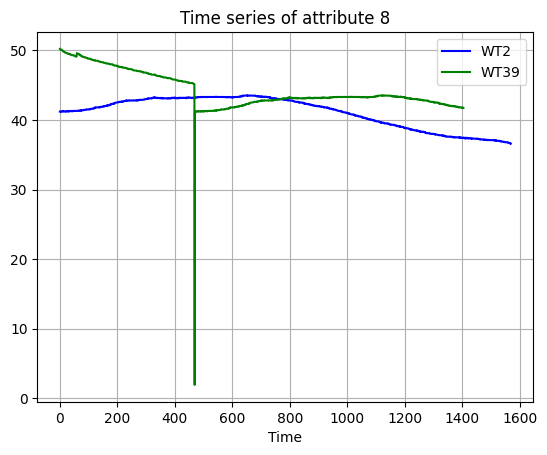

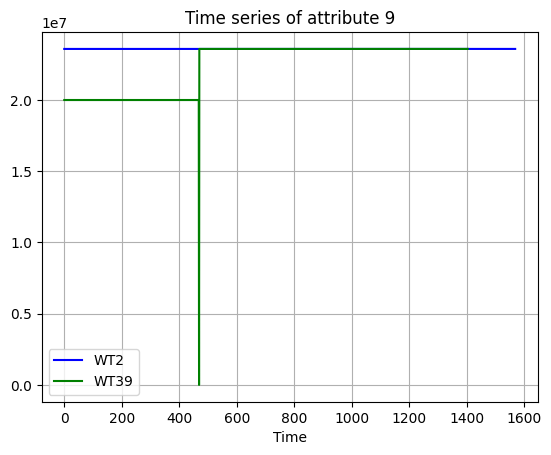

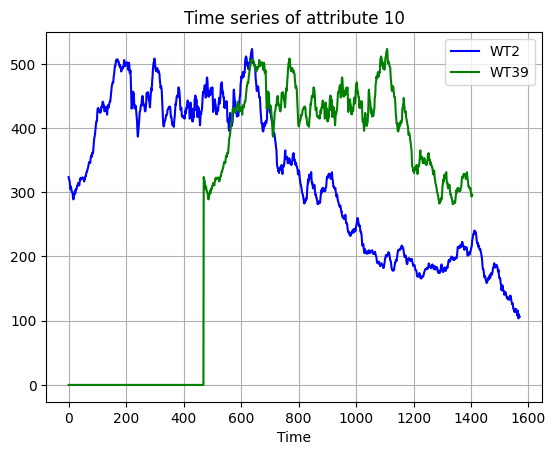

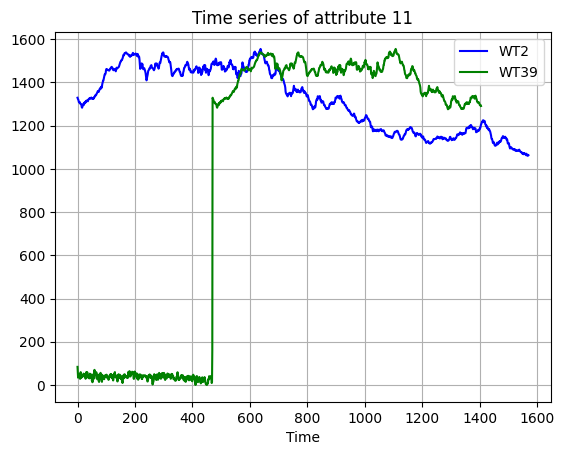

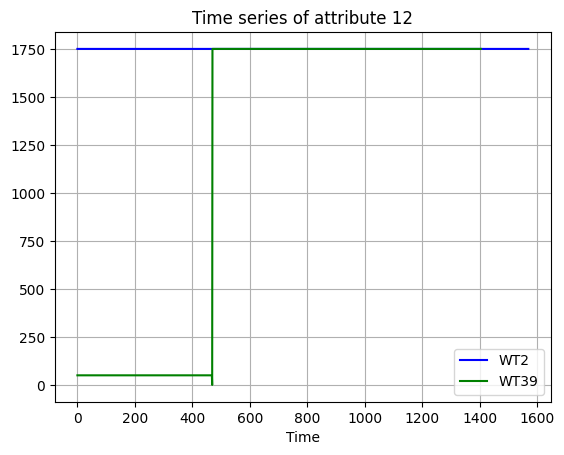

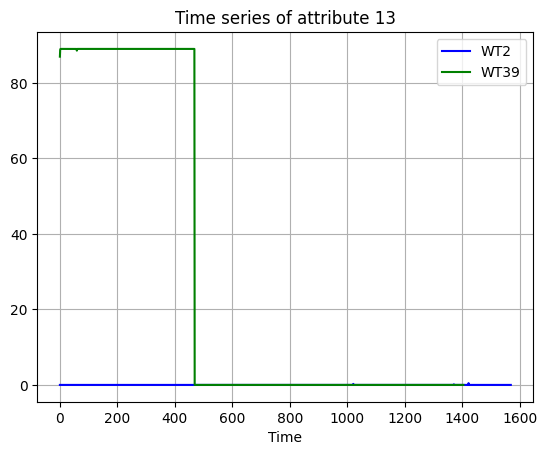

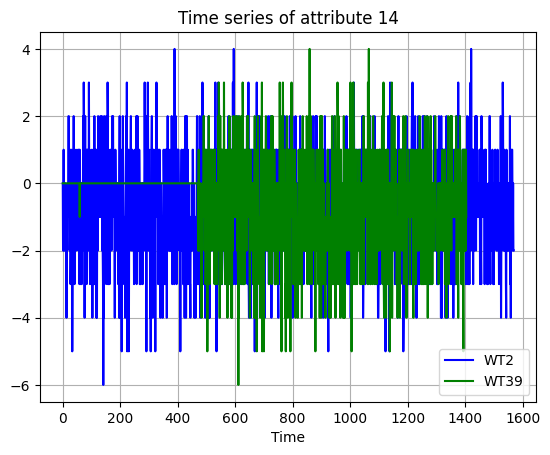

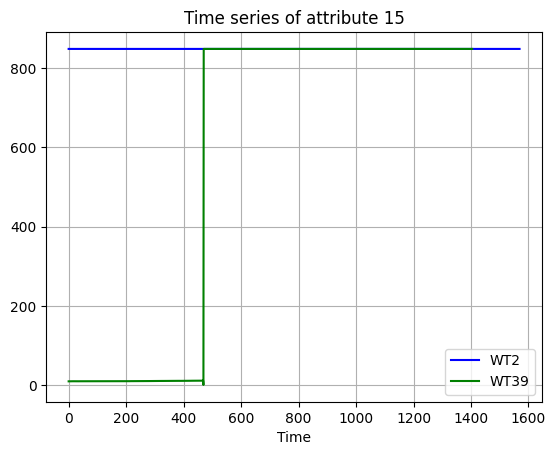

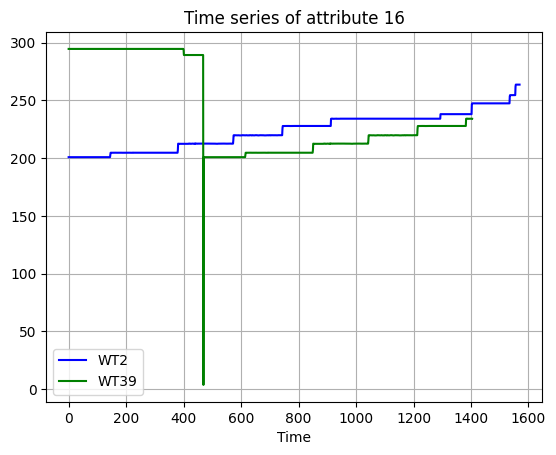

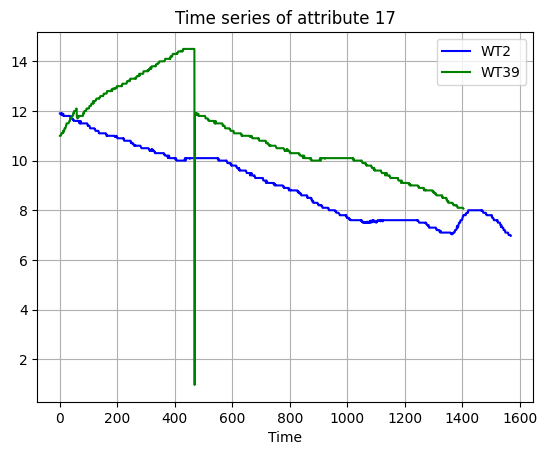

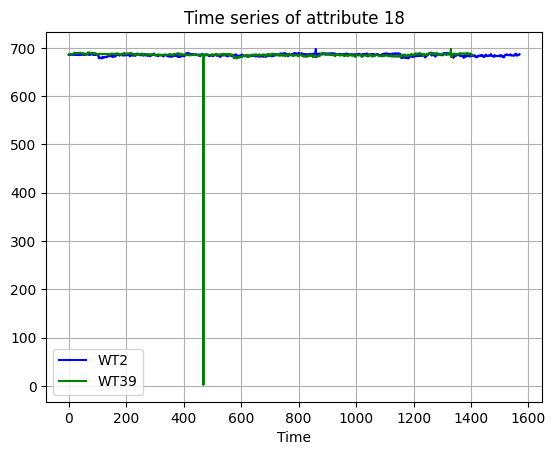

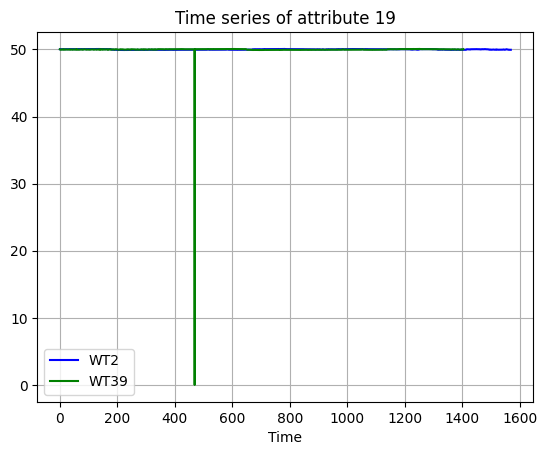

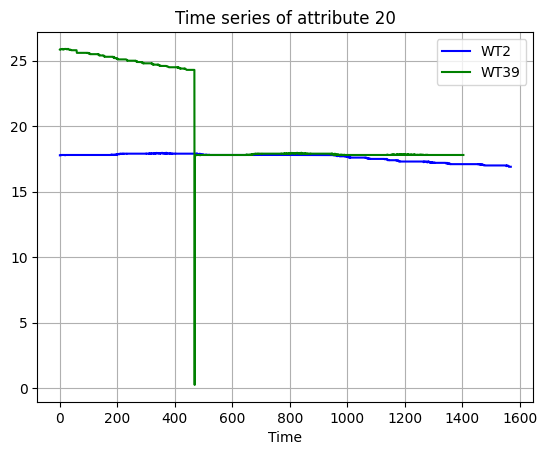

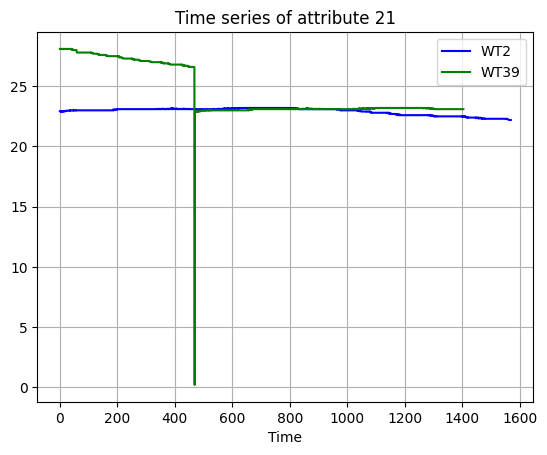

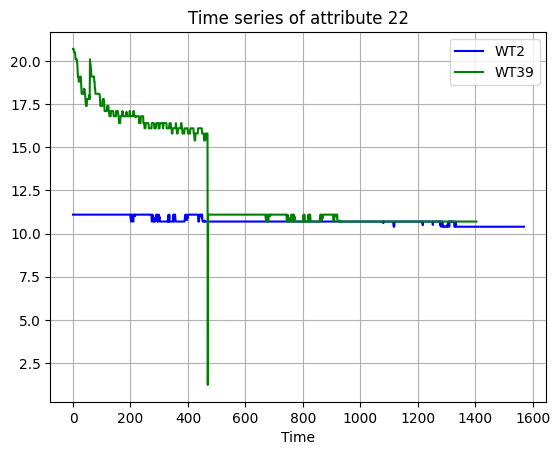

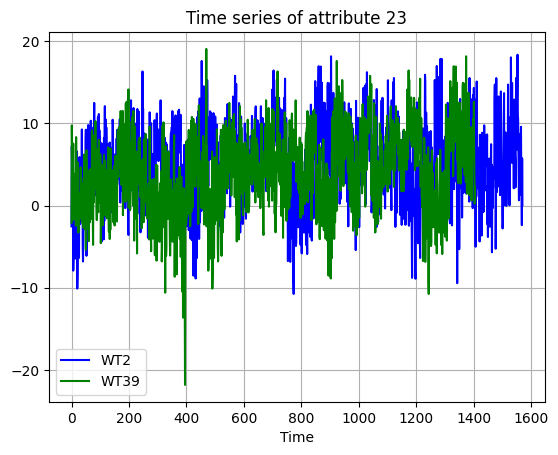

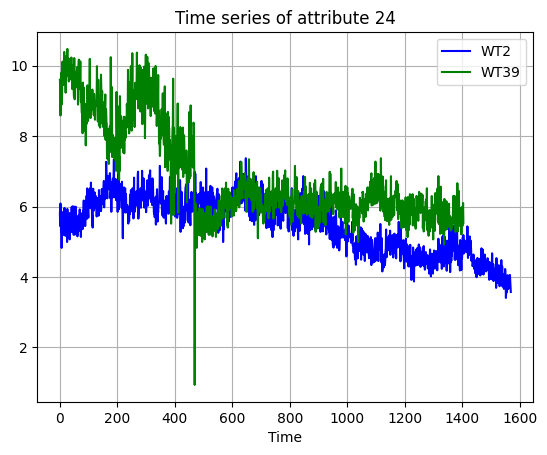

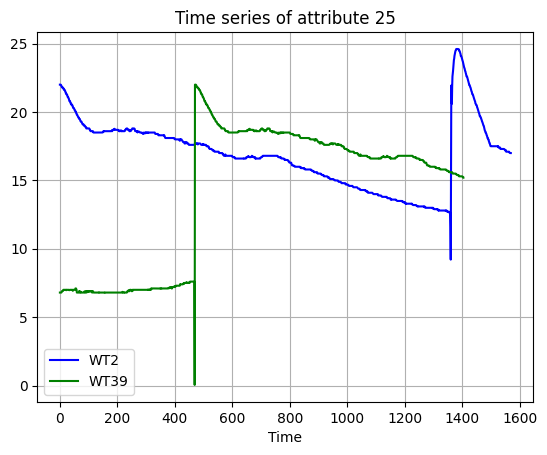

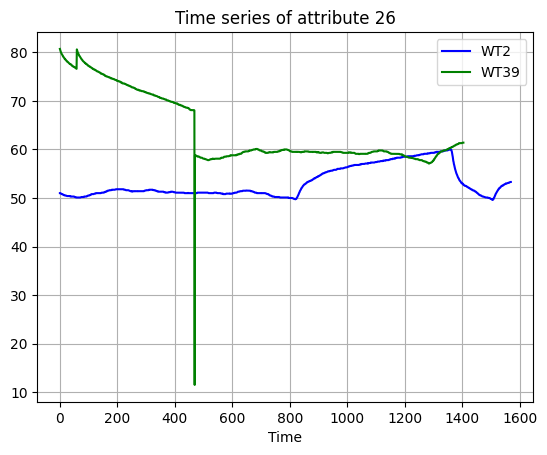

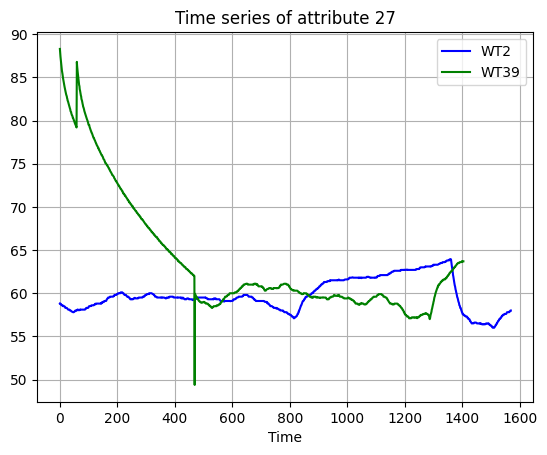

In [ ]:
# plot time series data for all variables for further inspection
picked_columns = range(27)
for col in picked_columns:
  plt.figure()
  plt.plot(WT2.iloc[:, col], label="WT2", color='blue')
  plt.plot(WT39.iloc[:, col], label="WT39", color='green')
  plt.title(f"Time series of attribute {col+1}")
  plt.xlabel("Time")
  plt.legend()
  plt.grid(True)
  plt.show()



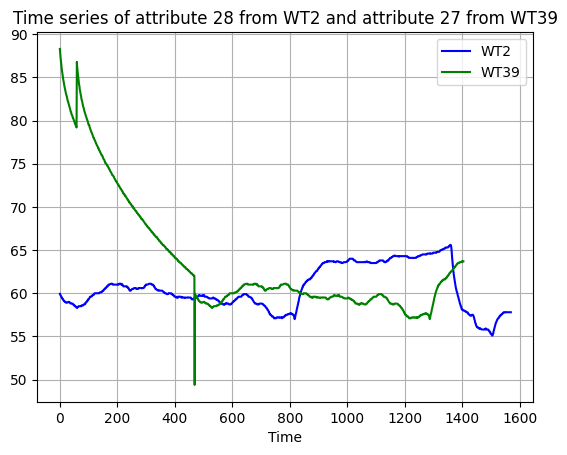

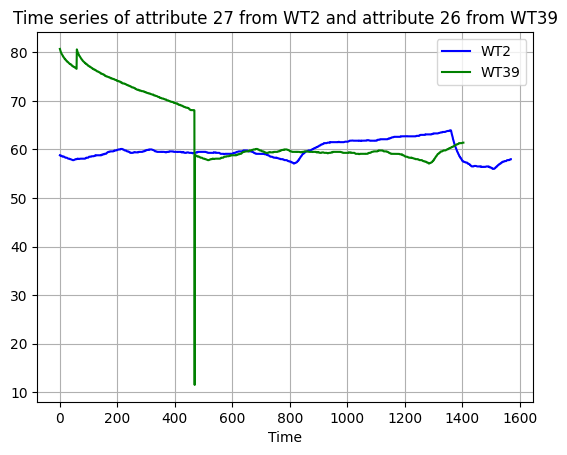

In [ ]:
# plot variable 28 from WT2 with variable 27 from WT39
plt.figure()
plt.plot(WT2.iloc[:, 27], label="WT2", color='blue')
plt.plot(WT39.iloc[:, 26], label="WT39", color='green')
plt.title(f"Time series of attribute 28 from WT2 and attribute 27 from WT39")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()

# plot variable 27 from WT2 with variable 26 from WT39
plt.figure()
plt.plot(WT2.iloc[:, 26], label="WT2", color='blue')
plt.plot(WT39.iloc[:, 25], label="WT39", color='green')
plt.title(f"Time series of attribute 27 from WT2 and attribute 26 from WT39")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Data pretreatment

WT2 = WT2.drop(WT2.columns[[25,8,11,12,14,18]], axis=1) # We dropped attribute 26, because there is no attribute 26 in WT39 and attributes 9,12,13,15,19 because the values do not vary
WT39 = WT39.drop(WT39.columns[[8,11,12,14,18]], axis=1)
WT2 = WT2.drop(WT2.tail(165).index) # We dropped 165 last rows because WT39 has fewer samples

WT39.columns = WT2.columns


In [ ]:
import numpy as np
train = WT2
train_f = WT39


In [ ]:
#We've created different models to try PCA on - with non-treated data, mean centered data, z-score standardized data, z-score robust and centered and MAD
mean_train = np.mean(train, 0)
std_train = np.std(train, 0)
median_train = np.median(train, 0)

no_treatment = train
mean_centered = train - mean_train
z_score = (train - mean_train)/std_train
z_robust = (train - median_train)/(np.median(np.absolute(train - median_train)))
center_mad = (train - mean_train)/(np.median(np.absolute(train - median_train)))

models = [no_treatment, mean_centered, z_score, z_robust, center_mad]

treatments = ["Non-treated data", "Mean Centered", "Z-score (STD)",  "Z-score (robust)", "Center and MAD"];

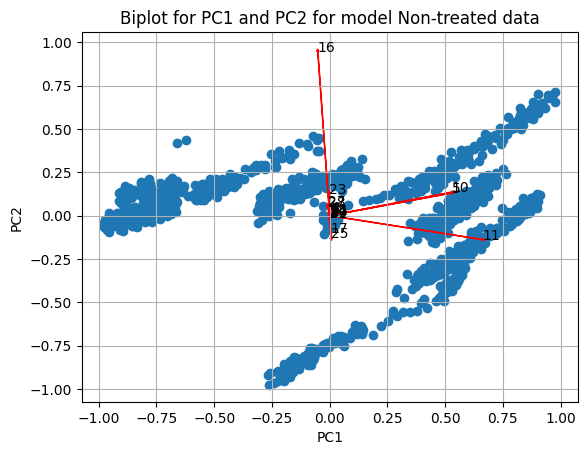

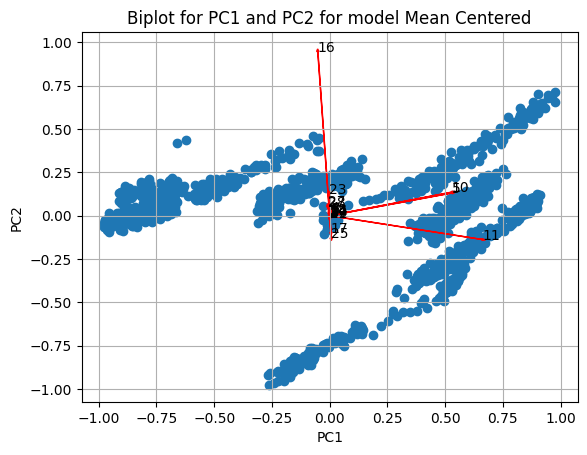

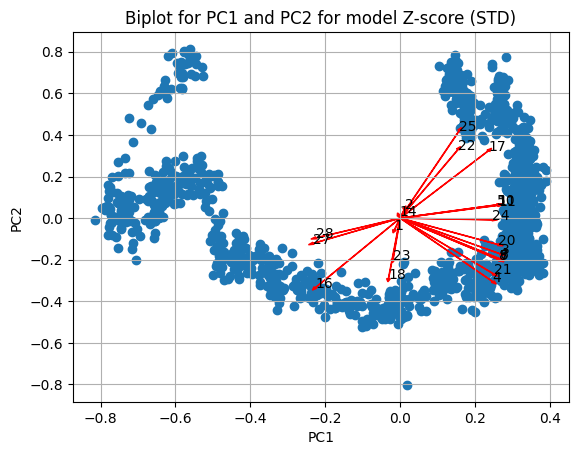

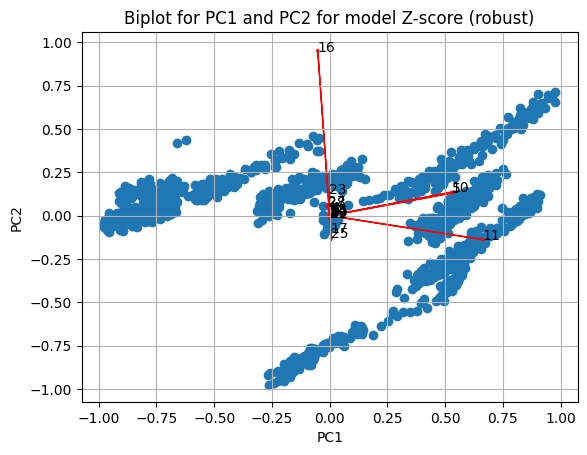

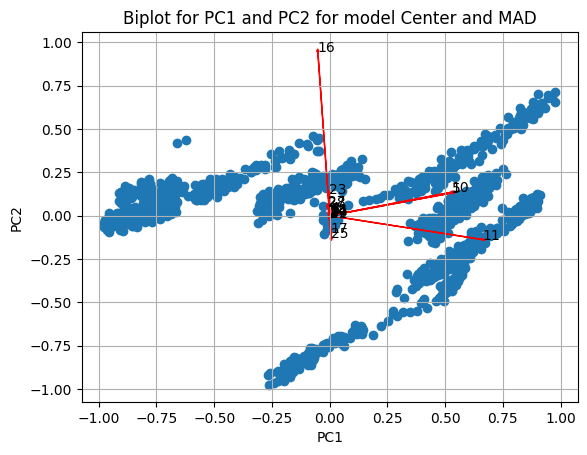

In [ ]:
#Doing PCA and ploting the biplots (projected data and loadings) for each model for first 2 principal components
from sklearn.decomposition import PCA
pca = PCA ()
j=0
for model in models:
  pca_data = pca.fit_transform(model)
  pca_data /= np.max(np.abs(pca_data), axis=0)
  pca_data *= np.max(np.abs(pca.components_))
  plt.scatter(pca_data[:,0], pca_data[:,1])
  for i, feature in enumerate(train.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.01, color="r")
    plt.text(pca.components_[0, i], pca.components_[1, i], feature)
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.grid(True)
  plt.title(f"Biplot for PC1 and PC2 for model {treatments[j]}")
  j=j+1
  plt.show()

In [ ]:
z_score_f = (train_f - mean_train)/std_train #Standardizing data from fault turbine using mean and std from normal working turbine

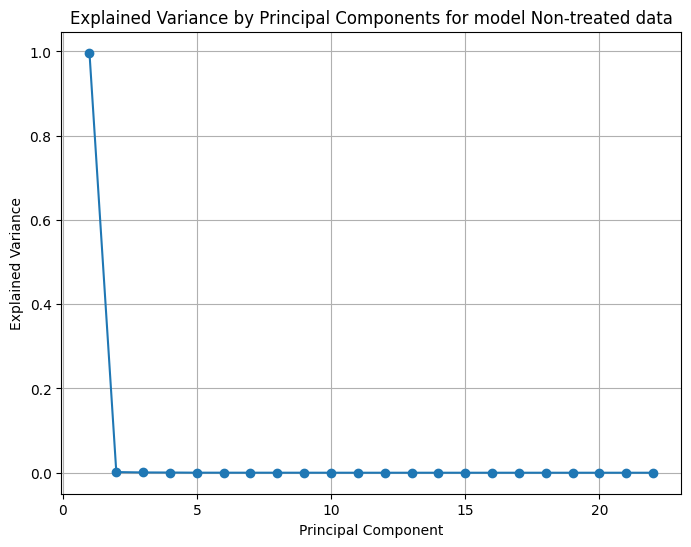

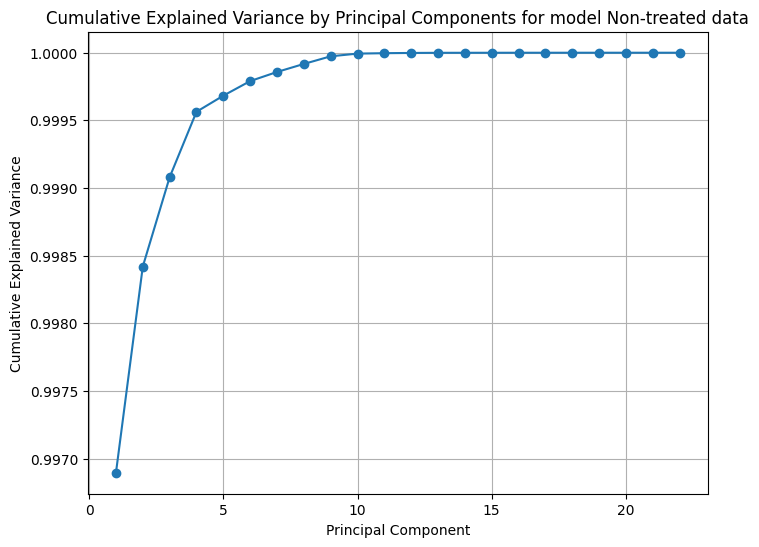

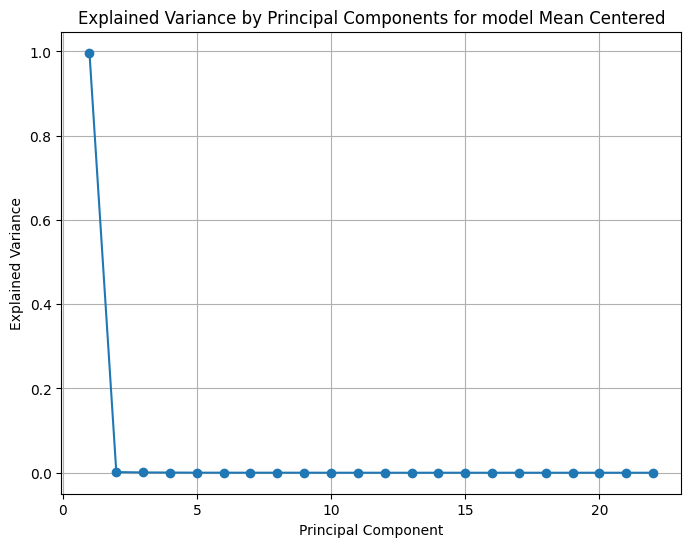

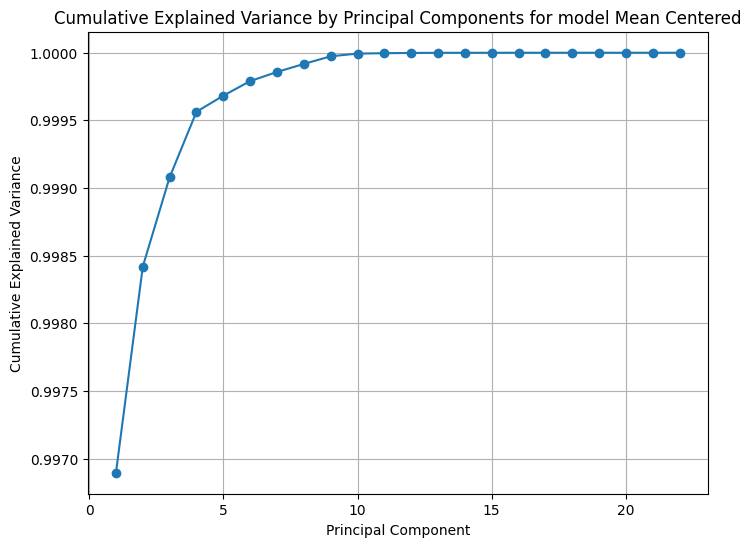

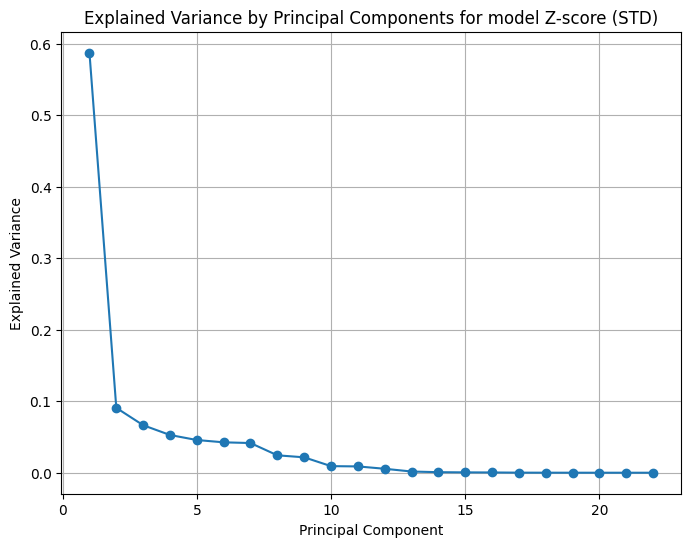

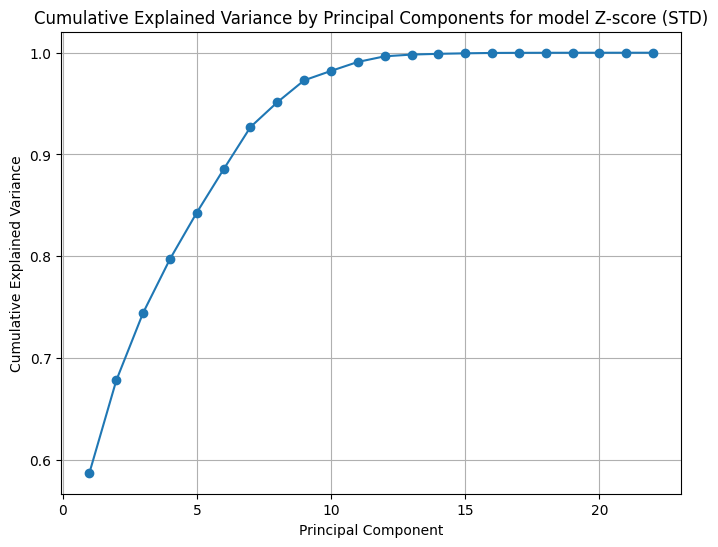

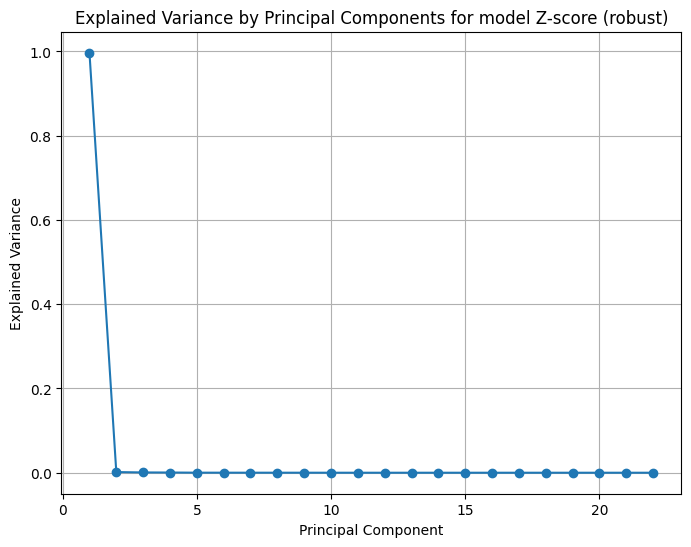

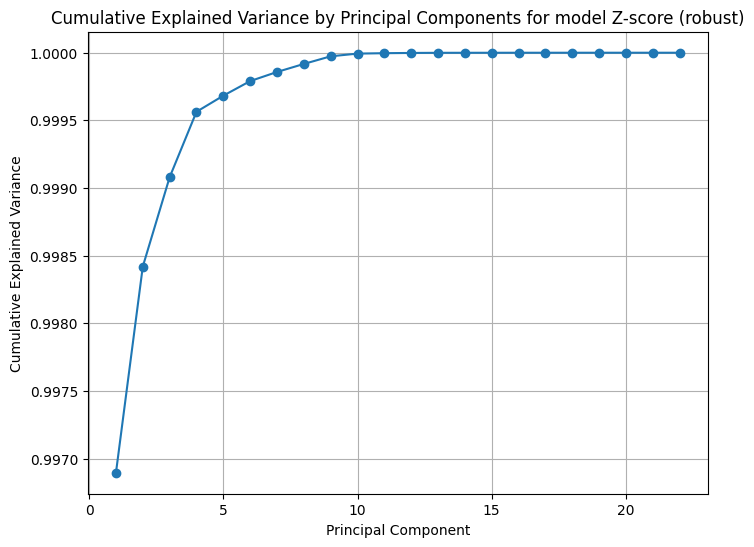

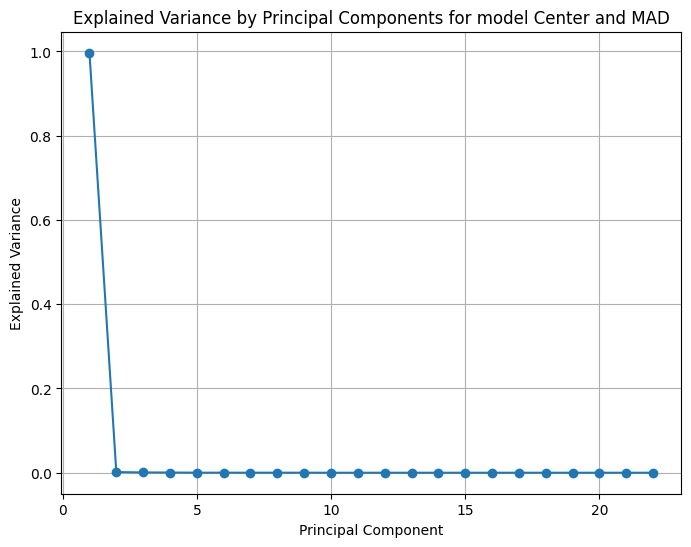

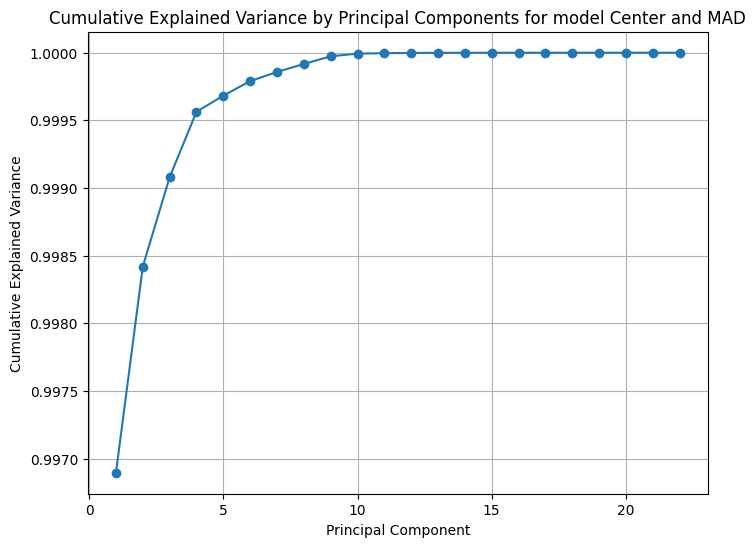

In [ ]:
for model, treatment in zip(models,treatments):
  pca = PCA()
  pca_data = pca.fit_transform(model)

  #Ploting amount of variance each PC explains
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
  plt.title(f'Explained Variance by Principal Components for model {treatment}')
  plt.xlabel('Principal Component')
  plt.ylabel('Explained Variance')
  plt.grid(True)
  plt.show()
  #Ploting cumulative sum of explained variance
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
  plt.title(f'Cumulative Explained Variance by Principal Components for model {treatment}')
  plt.xlabel('Principal Component')
  plt.ylabel('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()


<ipython-input-93-dea8a86d51ef>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(WT2.columns)


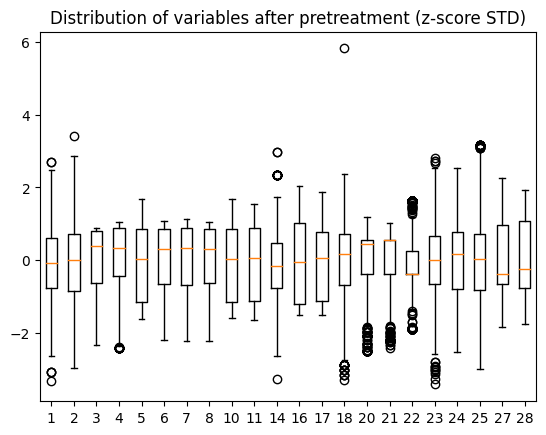

In [ ]:
#Plotting boxplots for z-score normalized working turbine dataset
ax = plt.axes()
ax.set_xticklabels(WT2.columns)
plt.boxplot(z_score)
plt.title("Distribution of variables after pretreatment (z-score STD)")
plt.show()

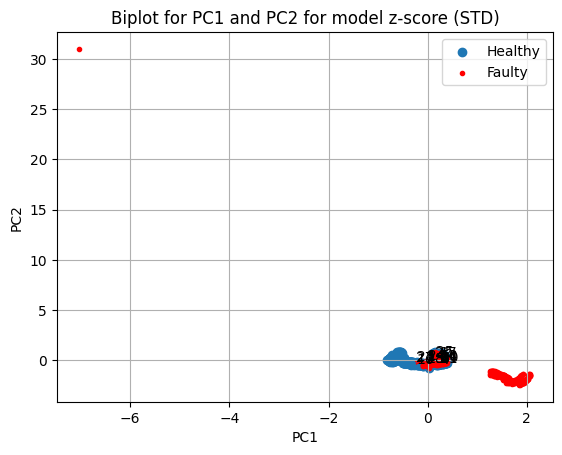

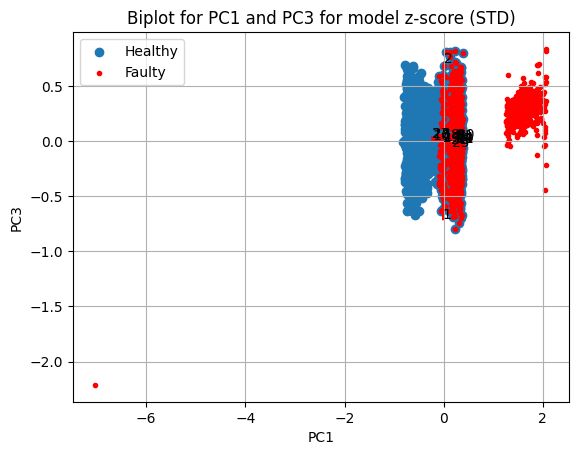

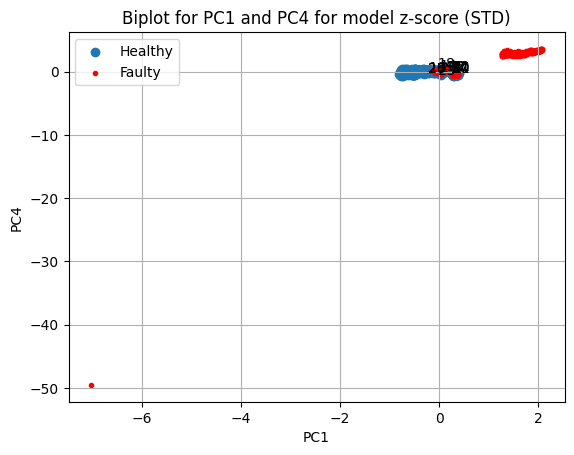

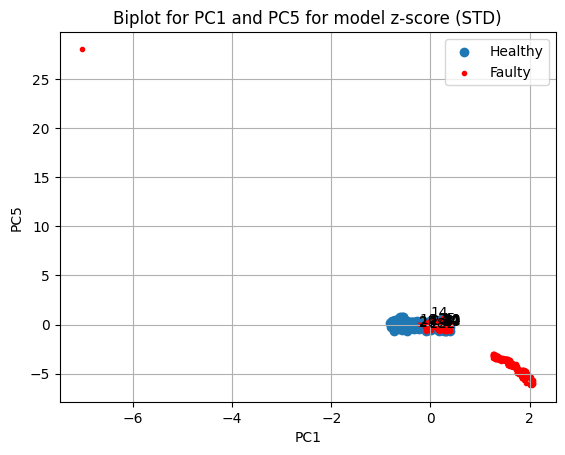

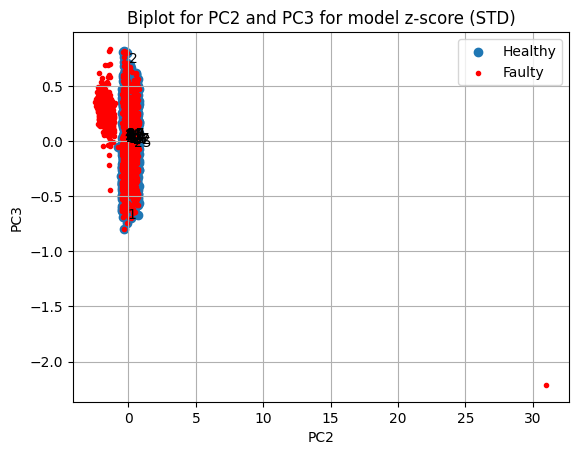

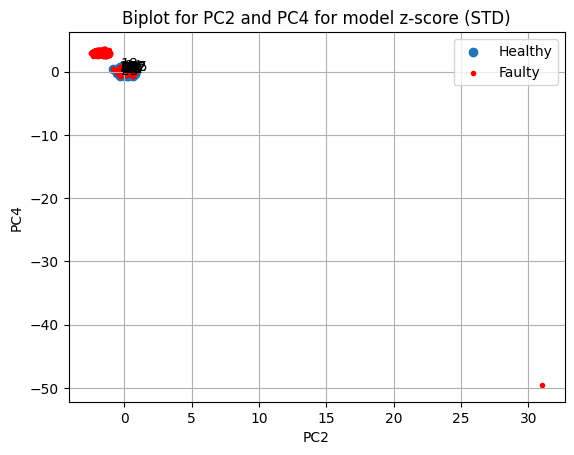

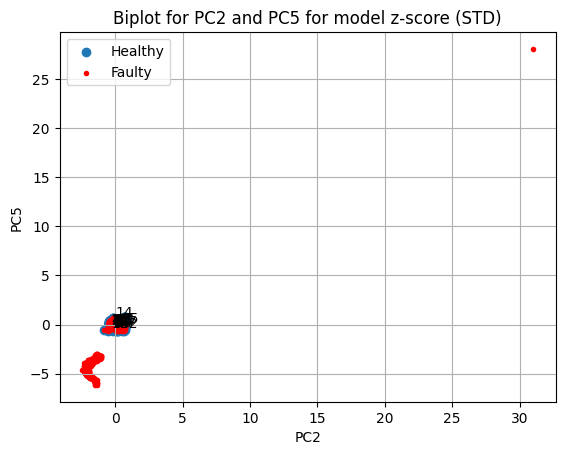

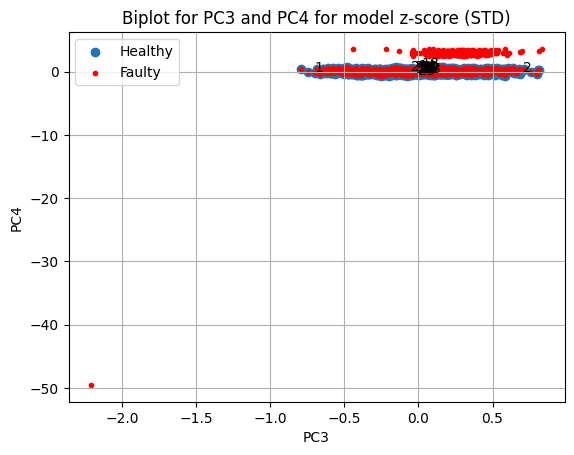

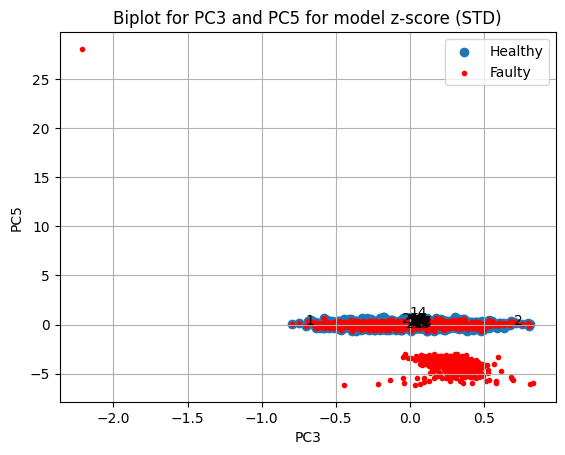

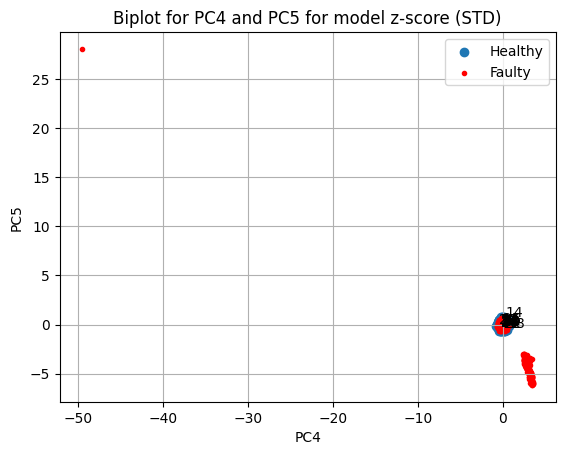

In [ ]:
#We decided to use the z-score normalized model and use 5 principal components
#Plotting data from faulty turbine and the data from working turbine after transforming them using PCA in the same biplot
pca = PCA(n_components=5)
pca_data = pca.fit_transform(z_score)
max_score = np.max(np.abs(pca_data), axis=0)
pca_data /= max_score
pca_data *= np.max(np.abs(pca.components_))

pca_projection = np.dot(z_score_f, np.transpose(pca.components_))
pca_projection /= max_score
pca_projection *= np.max(np.abs(pca.components_))

for PC1 in range(5):
  for PC2 in range(4-PC1):
    plt.scatter(pca_data[:,PC1], pca_data[:,PC1+PC2+1], label="Healthy")
    plt.scatter(pca_projection[:,PC1], pca_projection[:,PC1+PC2+1], marker=".", color='red', label="Faulty")
    for i, feature in enumerate(train.columns):
      plt.arrow(0, 0, pca.components_[PC1, i], pca.components_[PC1+PC2+1, i],
              head_width=0.01, color="r")
      plt.text(pca.components_[PC1, i], pca.components_[PC1+PC2+1, i], feature)
    plt.xlabel(f"PC{PC1+1}")
    plt.ylabel(f"PC{PC1+PC2+2}")
    plt.grid(True)
    plt.title(f"Biplot for PC{PC1+1} and PC{PC1+PC2+2} for model z-score (STD)")
    plt.legend()
    plt.show()

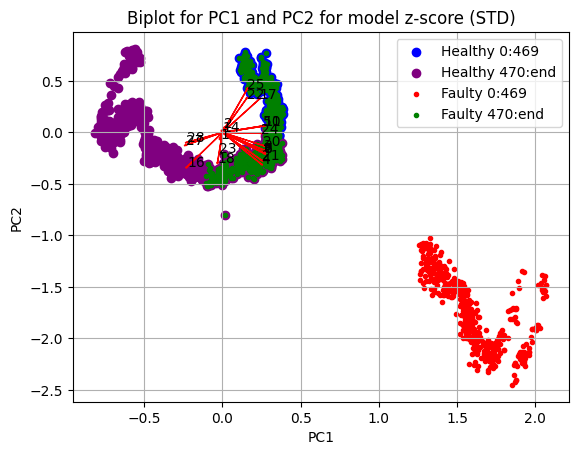

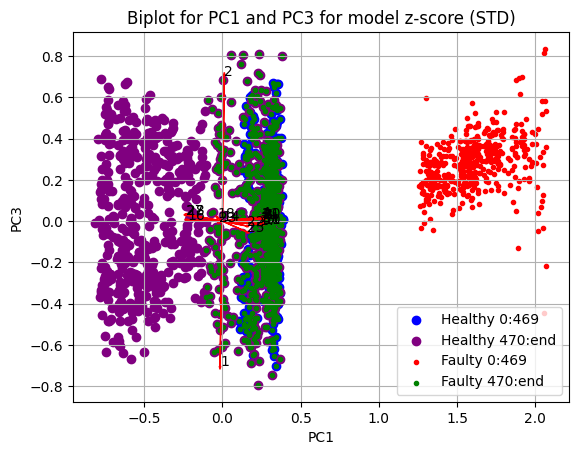

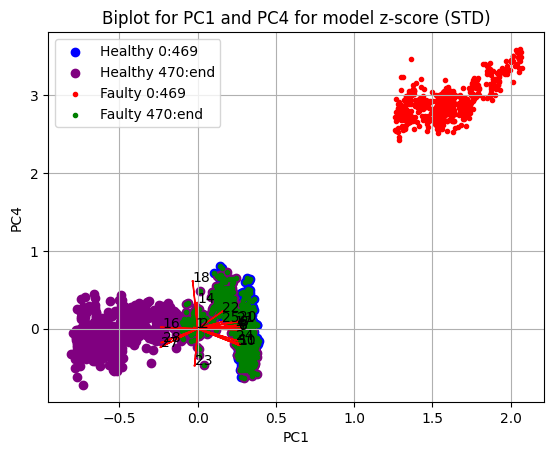

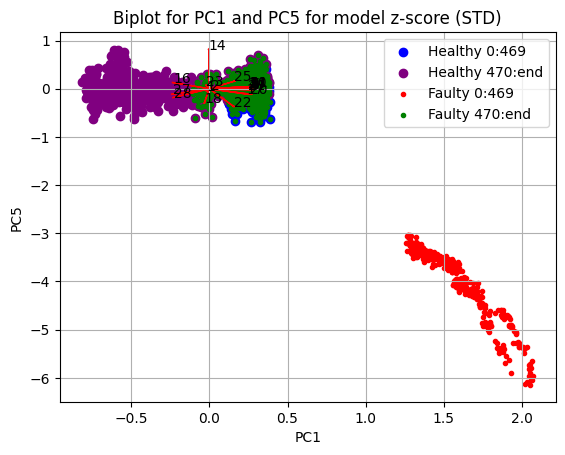

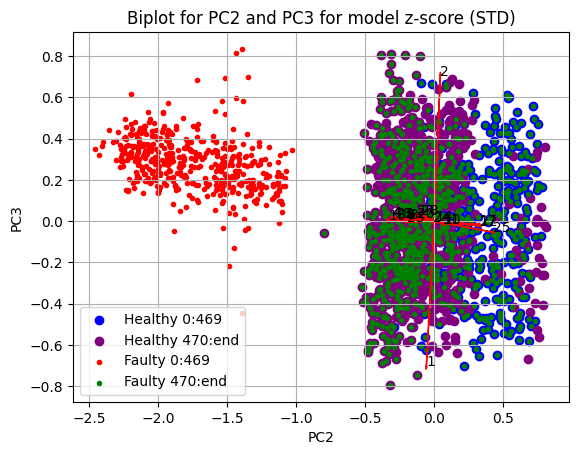

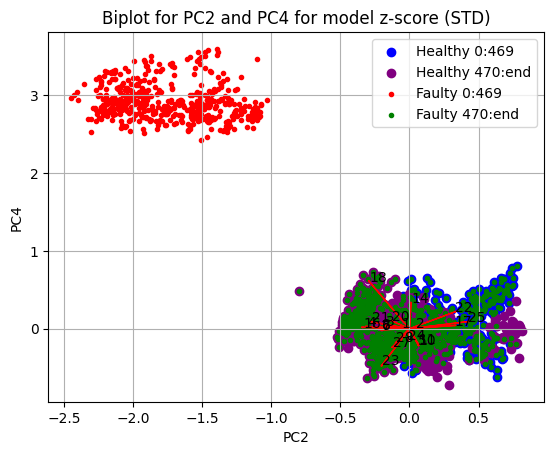

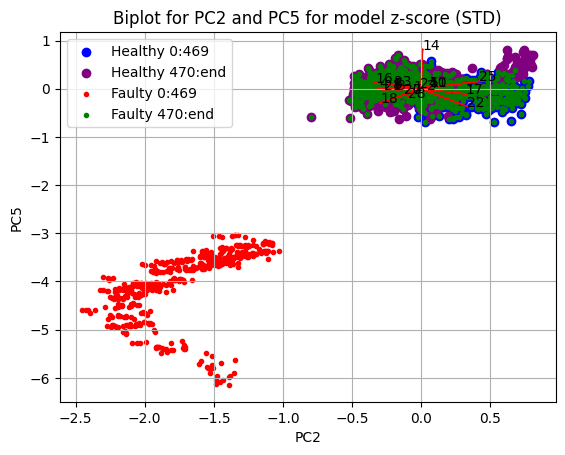

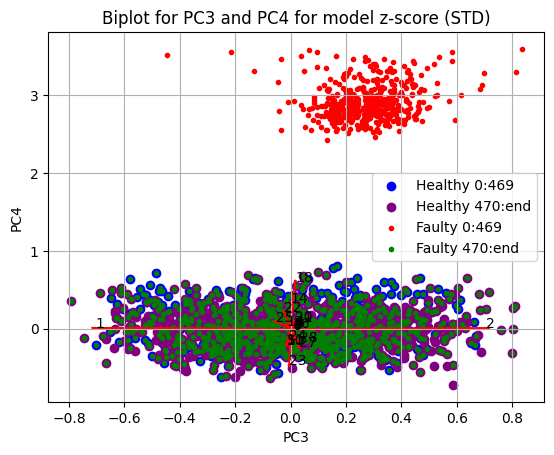

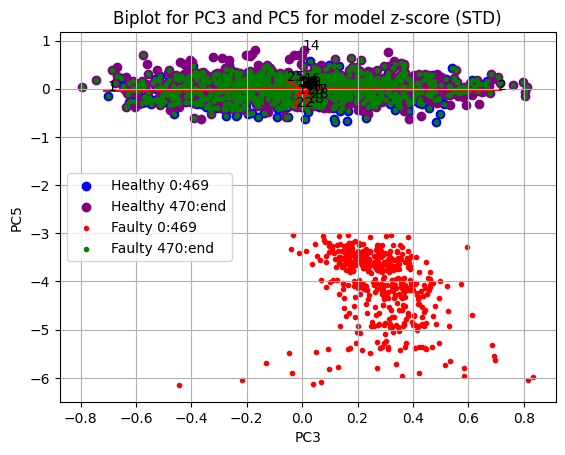

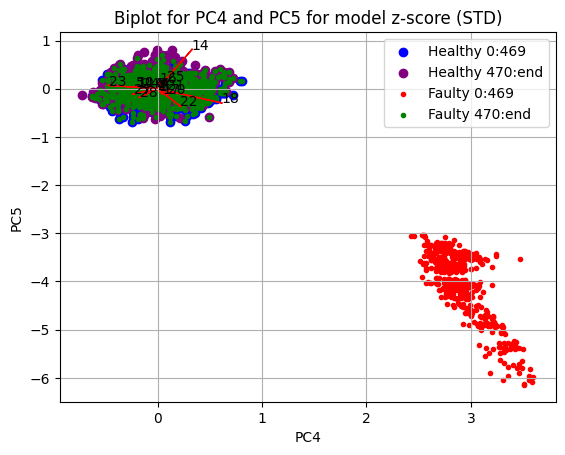

In [ ]:
#The outlier at index 469 in the faulty dataset is causing the plot to be unreadable, so we've decided to drop it
#Plotting data from faulty turbine (without reading at index 469) and the data from working turbine after transforming them using PCA in the same biplot
for PC1 in range(5):
  for PC2 in range(4-PC1):
    plt.scatter(pca_data[:469,PC1], pca_data[:469,PC1+PC2+1], color="blue", label="Healthy 0:469")
    plt.scatter(pca_data[470:,PC1], pca_data[470:,PC1+PC2+1], color="purple", label="Healthy 470:end")
    plt.scatter(pca_projection[:469,PC1], pca_projection[:469,PC1+PC2+1], marker=".", color='red', label="Faulty 0:469")
    plt.scatter(pca_projection[470:,PC1], pca_projection[470:,PC1+PC2+1], marker=".", color='green', label="Faulty 470:end")
    for i, feature in enumerate(train.columns):
      plt.arrow(0, 0, pca.components_[PC1, i], pca.components_[PC1+PC2+1, i],
              head_width=0.01, color="r")
      plt.text(pca.components_[PC1, i], pca.components_[PC1+PC2+1, i], feature)
    plt.xlabel(f"PC{PC1+1}")
    plt.ylabel(f"PC{PC1+PC2+2}")
    plt.grid(True)
    plt.title(f"Biplot for PC{PC1+1} and PC{PC1+PC2+2} for model z-score (STD)")
    plt.legend()
    plt.show()

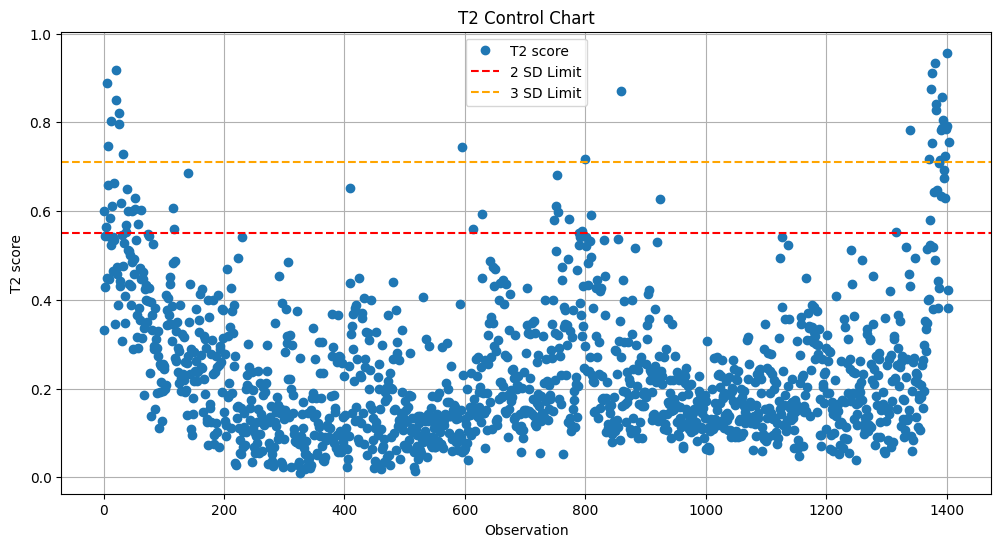

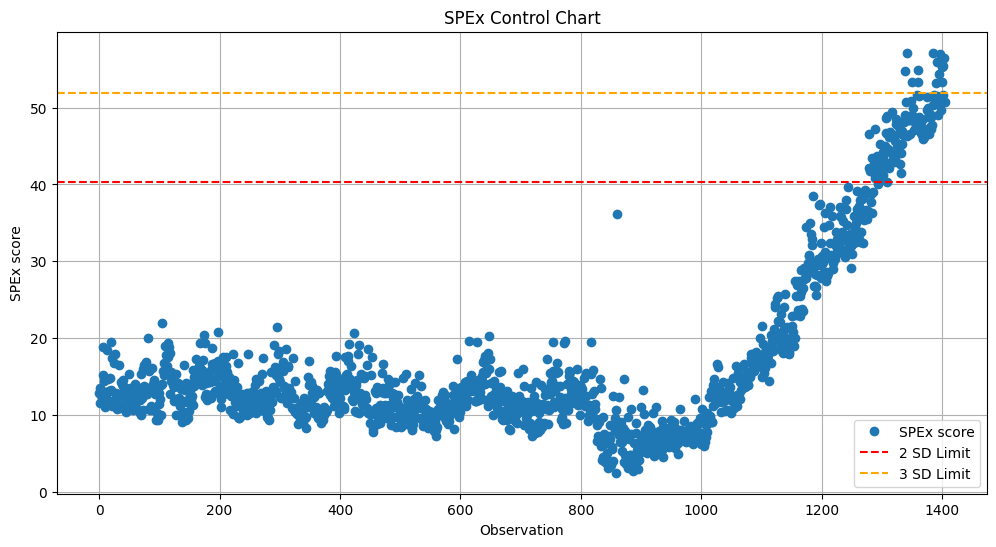

In [ ]:
#Plotting T2 and SPEx control charts for working turbine
z_score_reconstructed = pca.inverse_transform(pca_data)
spe = np.sum((z_score - z_score_reconstructed) ** 2, axis=1)

cov_matrix = np.cov(pca_data, rowvar=False)
cov_matrix_inv = np.linalg.inv(cov_matrix)
t2 = np.sum((pca_data / np.sqrt(pca.explained_variance_))**2, axis=1)

t2_mean, t2_std = np.mean(t2), np.std(t2)
spe_mean, spe_std = np.mean(spe), np.std(spe)
t2_limit_2sd = t2_mean + 2 * t2_std
t2_limit_3sd = t2_mean + 3 * t2_std
spe_limit_2sd = spe_mean + 2 * spe_std
spe_limit_3sd = spe_mean + 3 * spe_std

#Plotting T2 control graph
plt.figure(figsize=(12, 6))
plt.plot(t2, 'o', label='T2 score')
plt.axhline(t2_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(t2_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('T2 Control Chart')
plt.xlabel('Observation')
plt.ylabel('T2 score')
plt.legend()
plt.grid(True)
plt.show()

#Plotting SPEx control graph
plt.figure(figsize=(12, 6))
plt.plot(spe, 'o', label='SPEx score')
plt.axhline(spe_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(spe_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('SPEx Control Chart')
plt.xlabel('Observation')
plt.ylabel('SPEx score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Calculating T2 and SPEx score of the faulty turbine data
z_score_reconstructed_f = pca.inverse_transform(pca_projection)

spe_f = np.sum((z_score_f - z_score_reconstructed_f) ** 2, axis=1)
spe_f = spe_f.to_numpy()

t2_f = np.sum((pca_projection / np.sqrt(pca.explained_variance_))**2, axis=1)

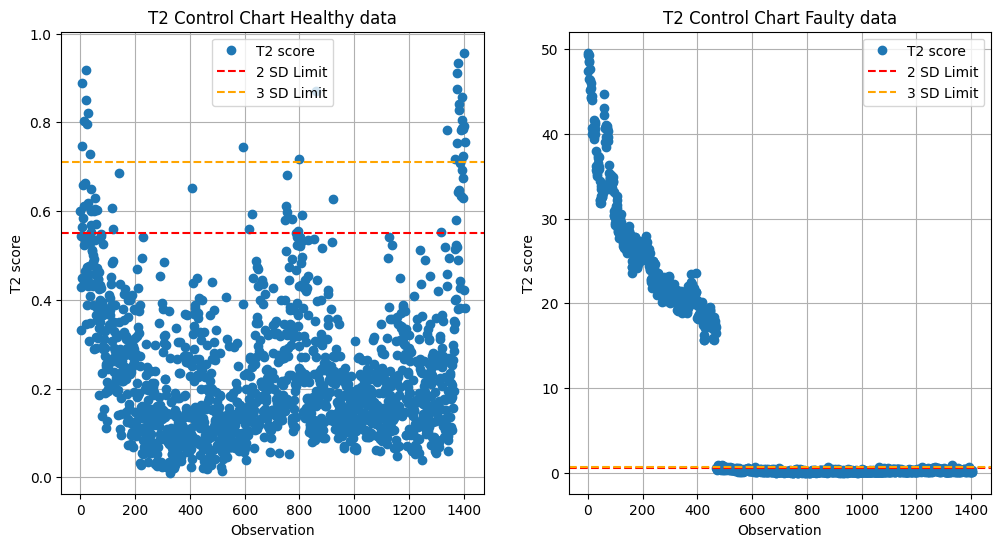

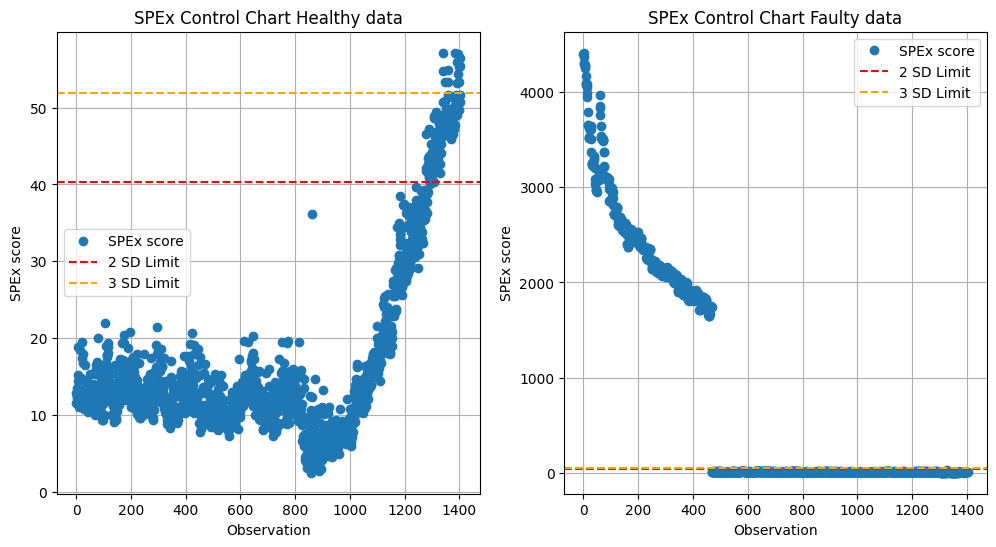

In [ ]:
#Plotting T2 control graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t2, 'o', label='T2 score')
plt.axhline(t2_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(t2_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('T2 Control Chart Healthy data')
plt.xlabel('Observation')
plt.ylabel('T2 score')
plt.legend()
plt.grid(True)

#Plotting T2 control graph with faulty data
plt.subplot(1, 2, 2)
plt.plot(np.delete(t2_f, 469), 'o', label='T2 score')
plt.axhline(t2_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(t2_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('T2 Control Chart Faulty data')
plt.xlabel('Observation')
plt.ylabel('T2 score')
plt.legend()
plt.grid(True)
plt.show()

#Plotting SPEx control graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(spe, 'o', label='SPEx score')
plt.axhline(spe_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(spe_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('SPEx Control Chart Healthy data')
plt.xlabel('Observation')
plt.ylabel('SPEx score')
plt.legend()
plt.grid(True)

#Plotting SPEx control graph with faulty data
plt.subplot(1, 2, 2)
plt.plot(np.delete(spe_f, 469), 'o', label='SPEx score')
plt.axhline(spe_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
plt.axhline(spe_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
plt.title('SPEx Control Chart Faulty data')
plt.xlabel('Observation')
plt.ylabel('SPEx score')
plt.legend()
plt.grid(True)
plt.show()

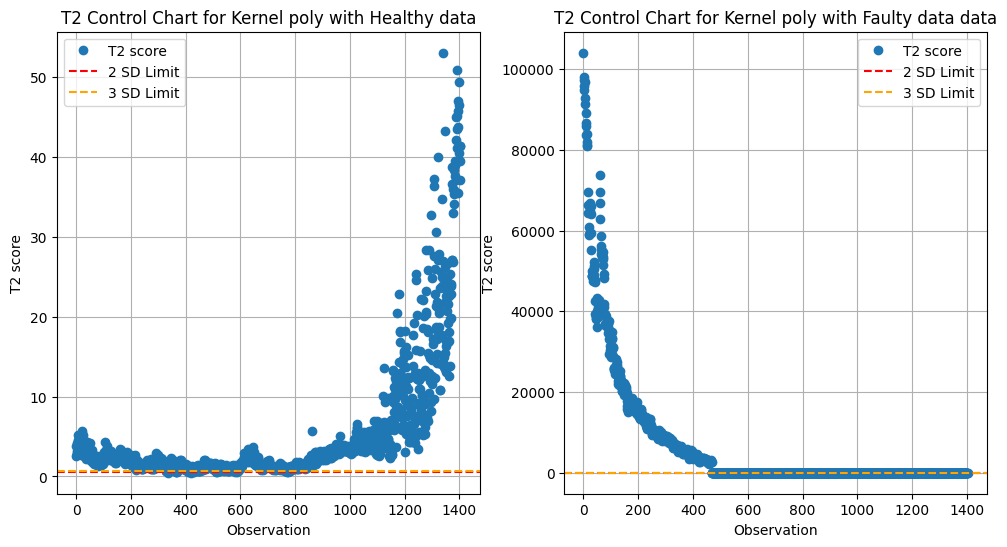

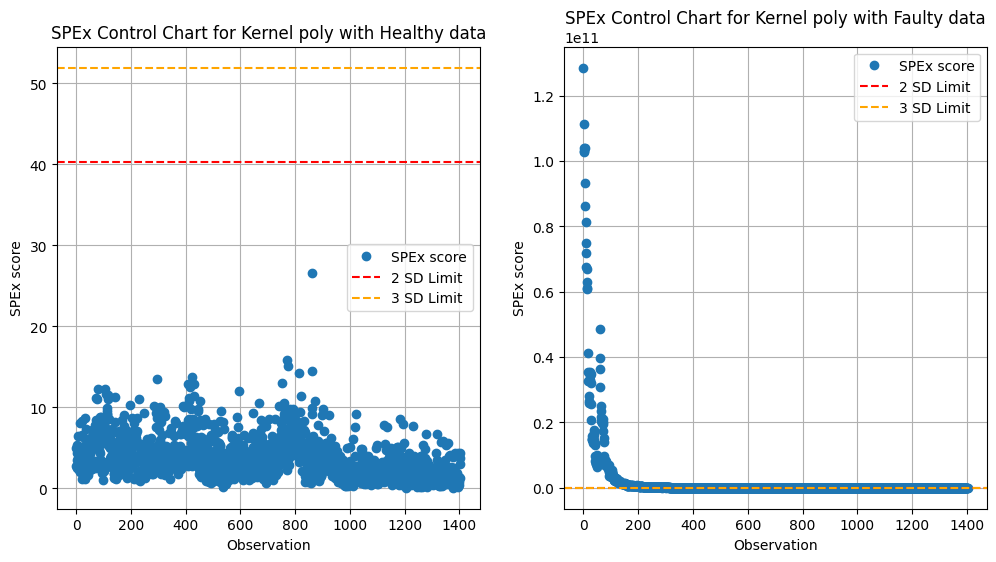

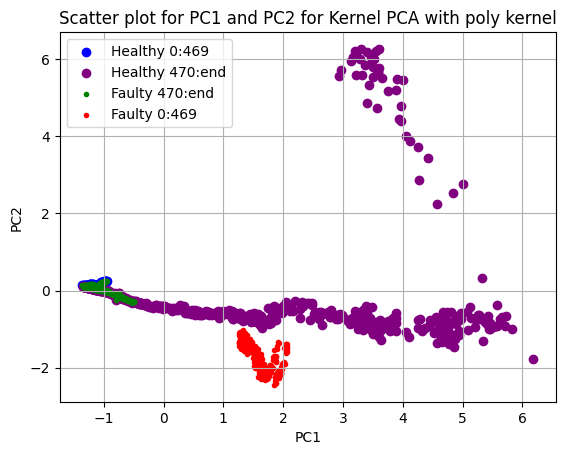

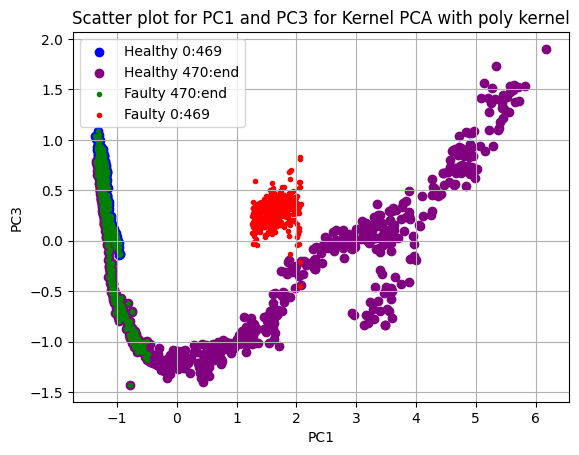

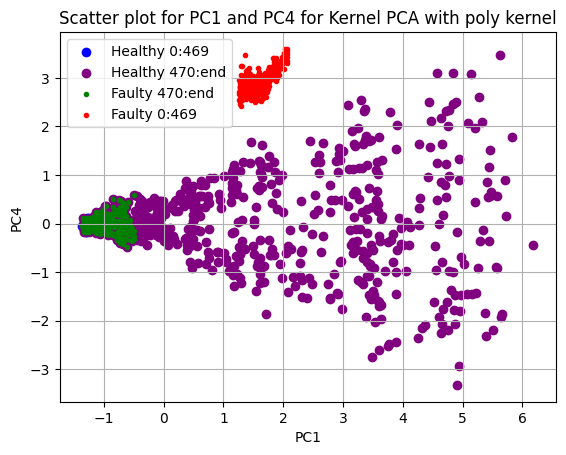

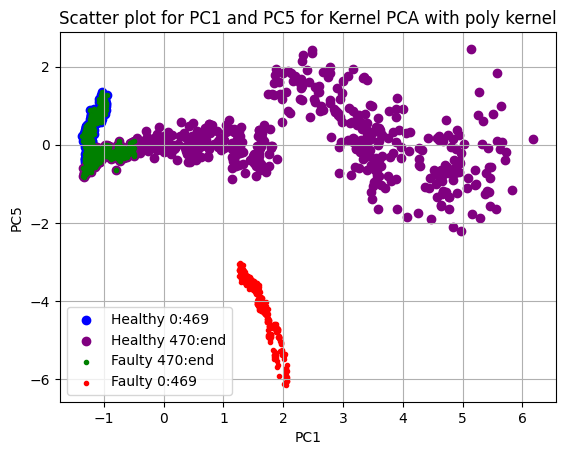

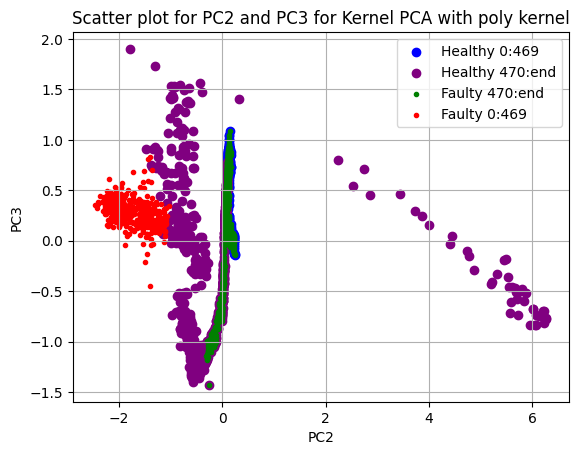

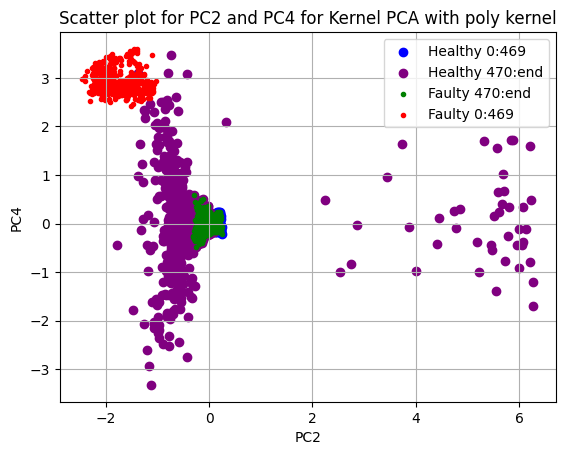

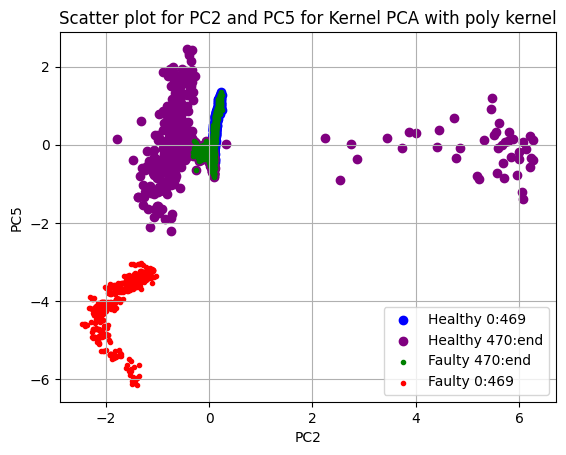

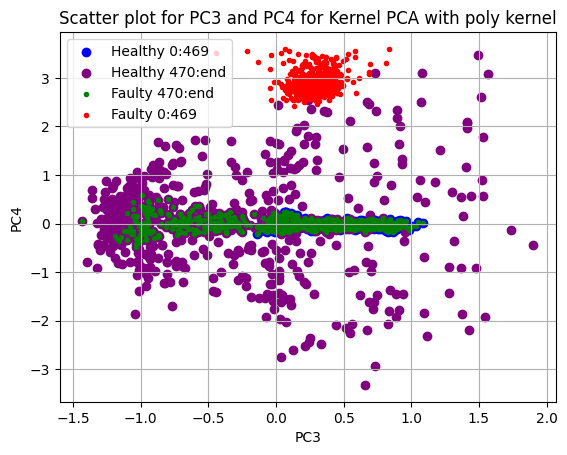

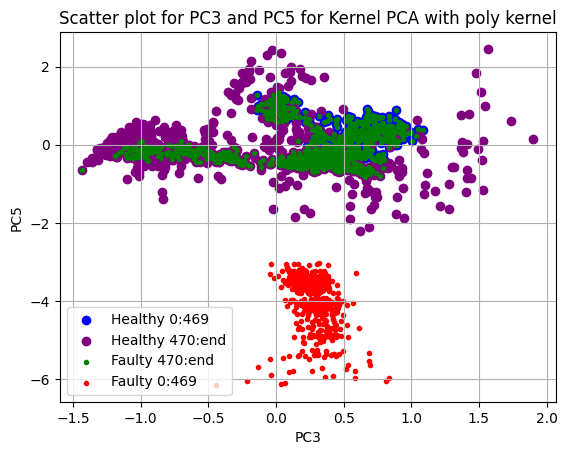

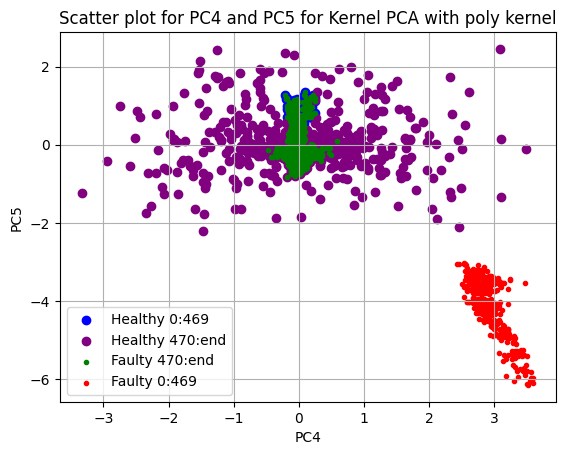

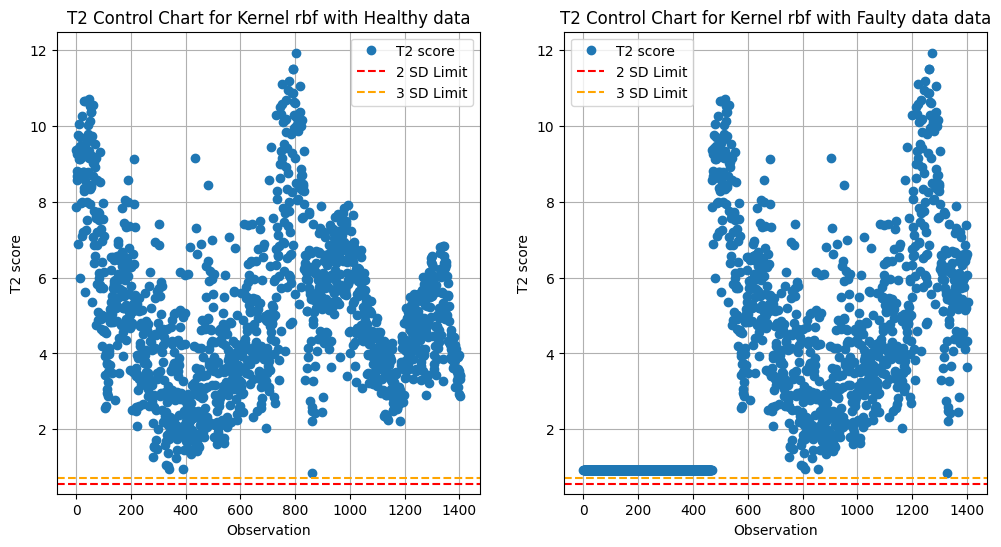

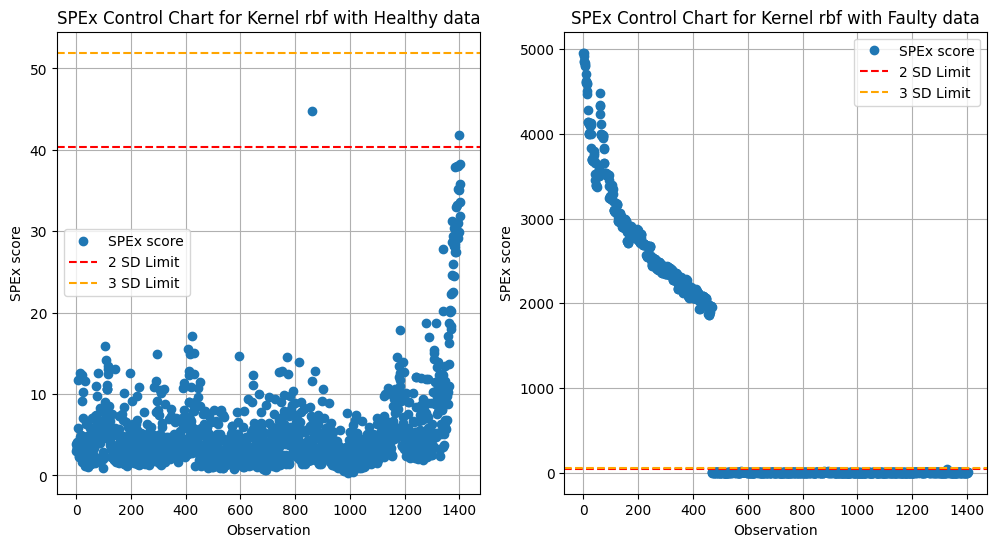

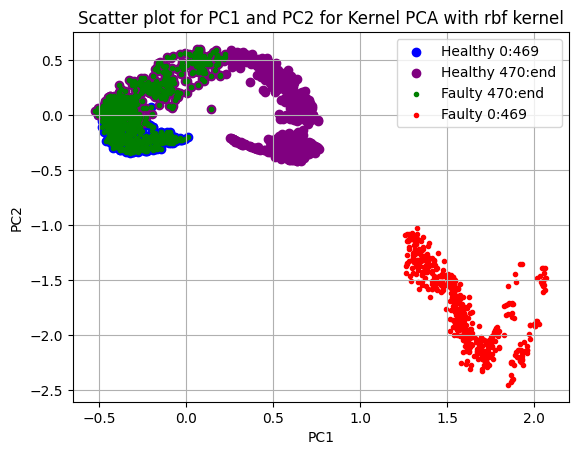

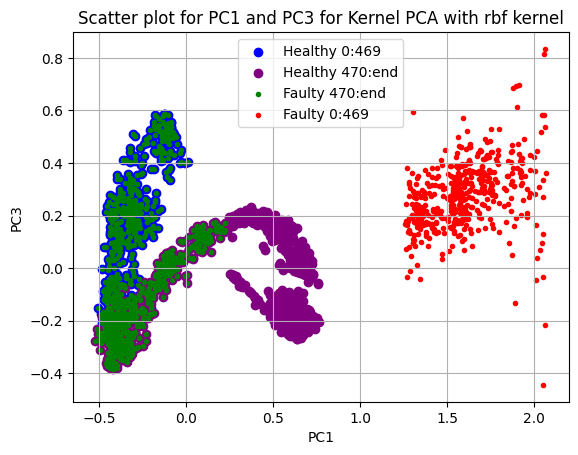

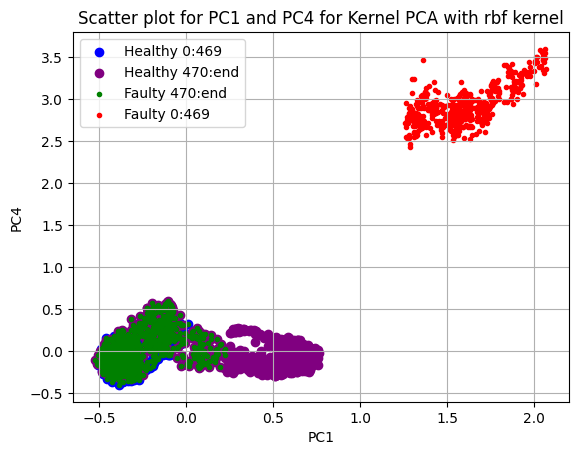

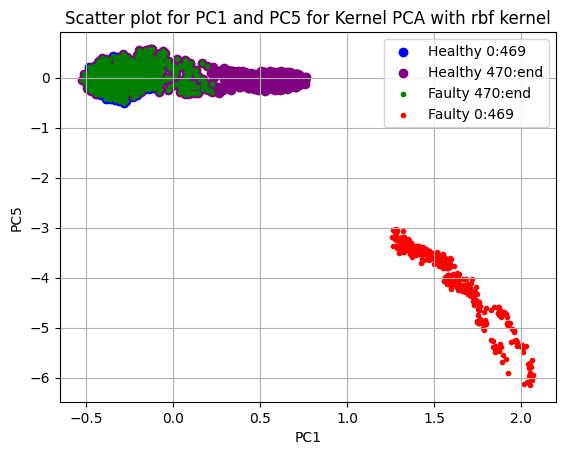

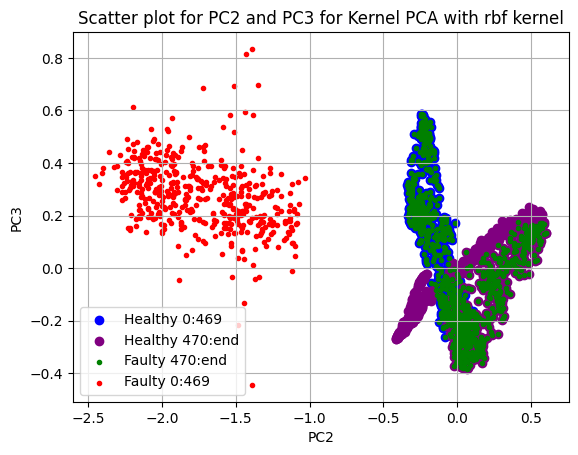

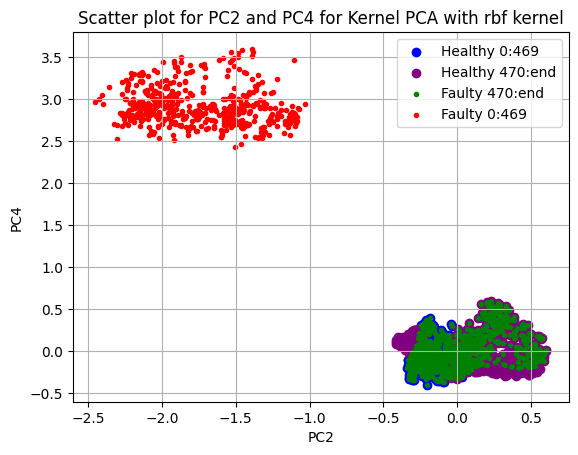

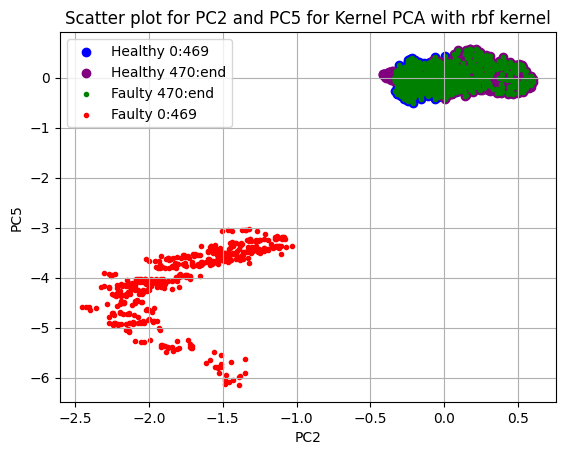

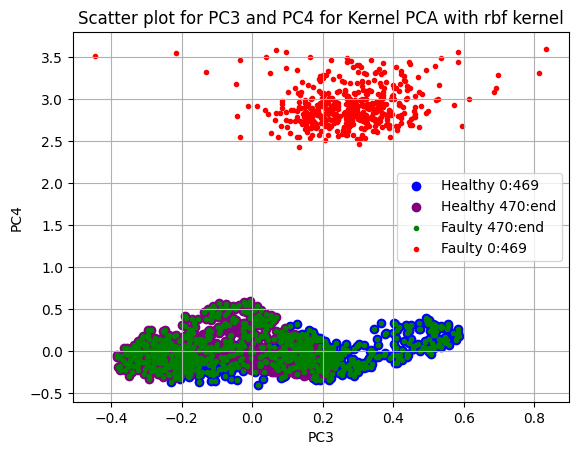

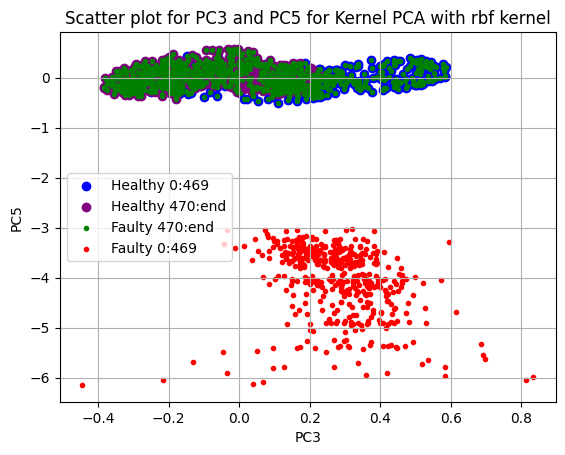

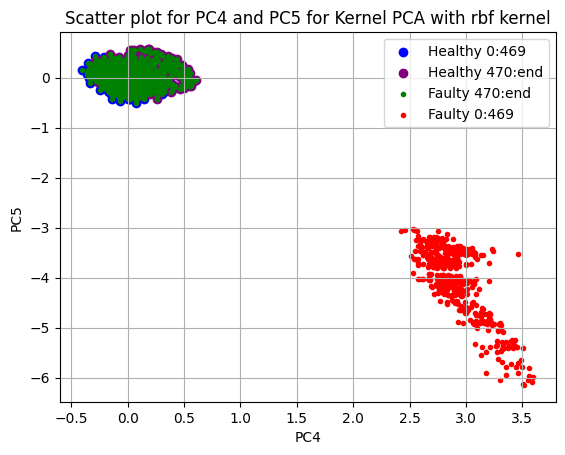

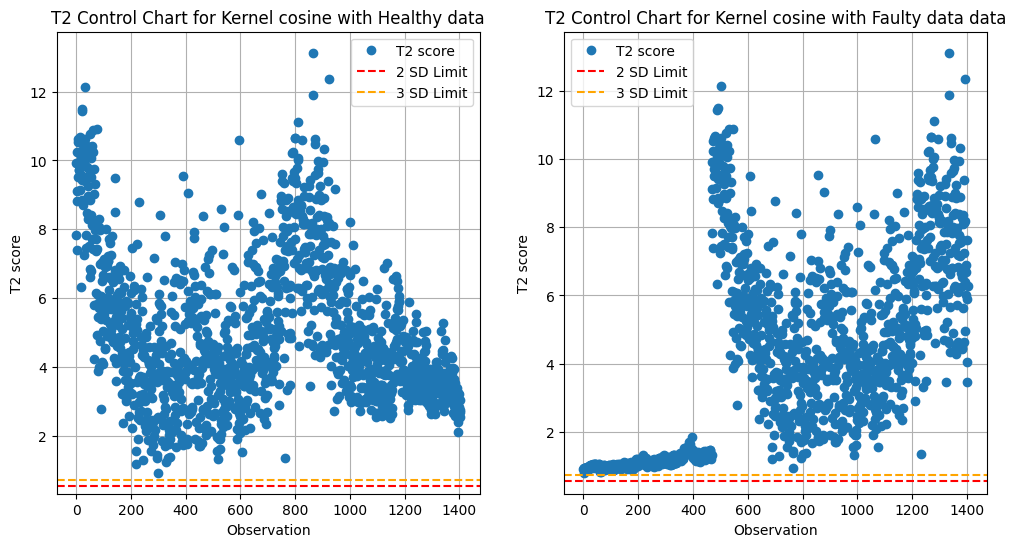

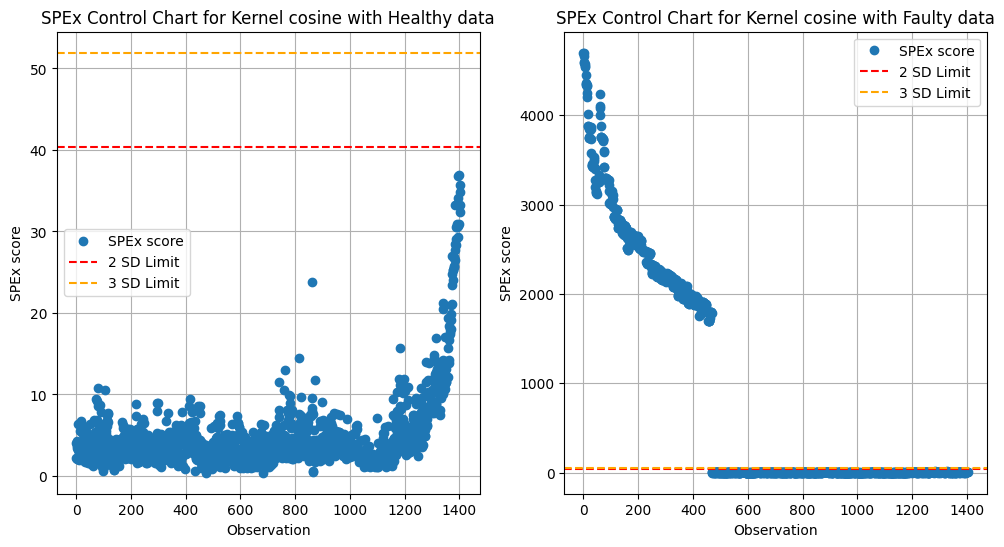

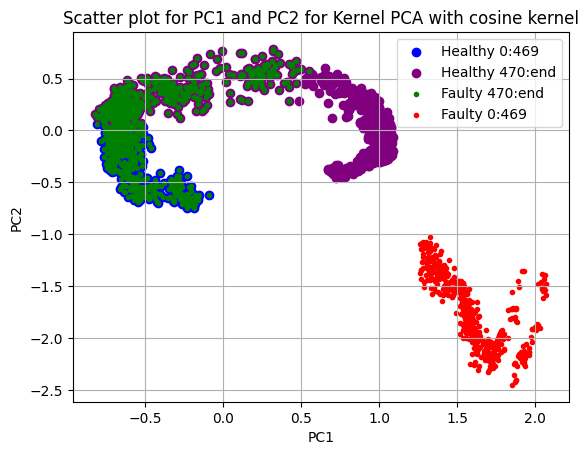

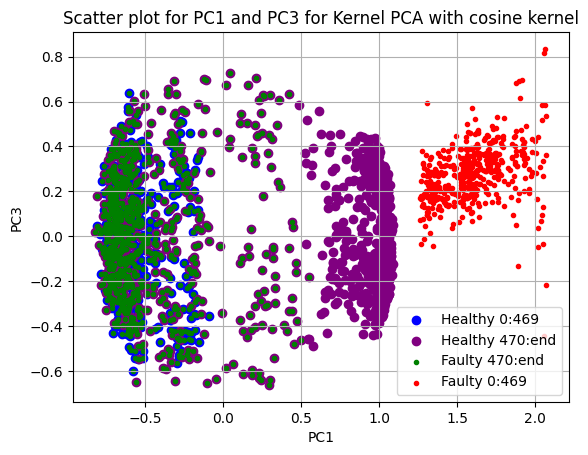

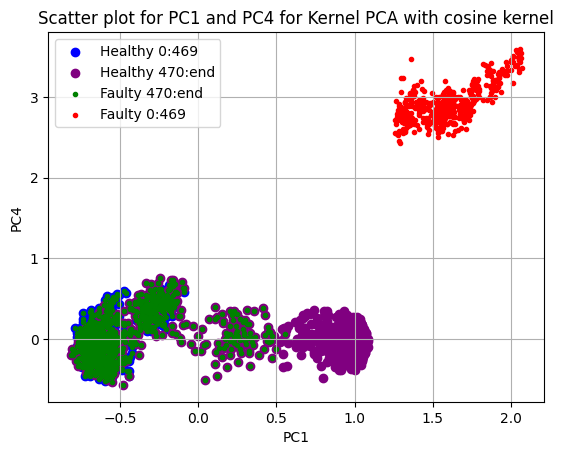

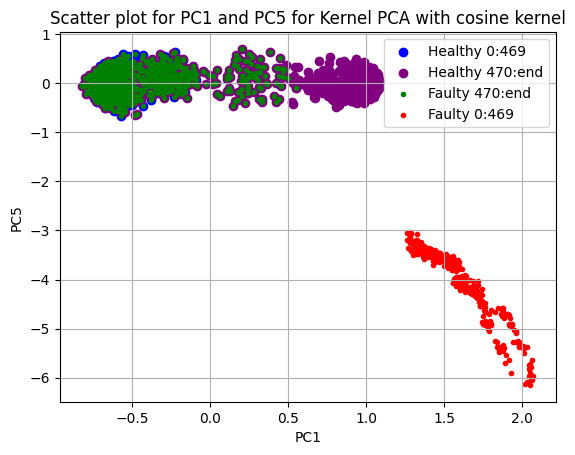

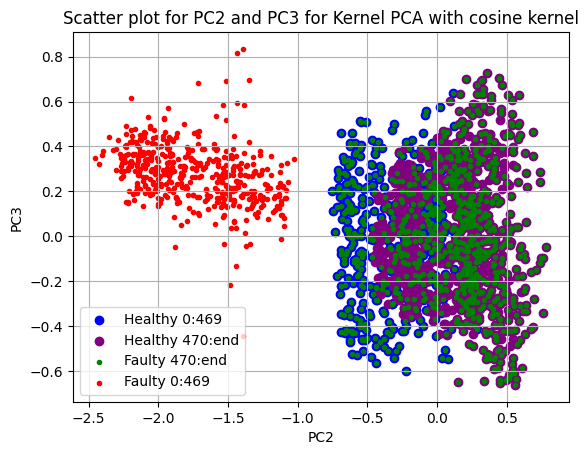

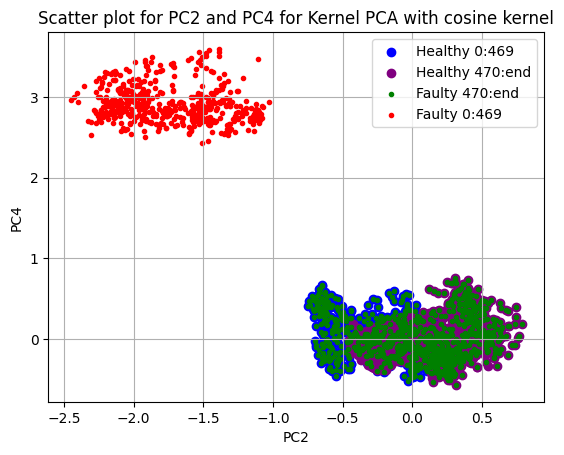

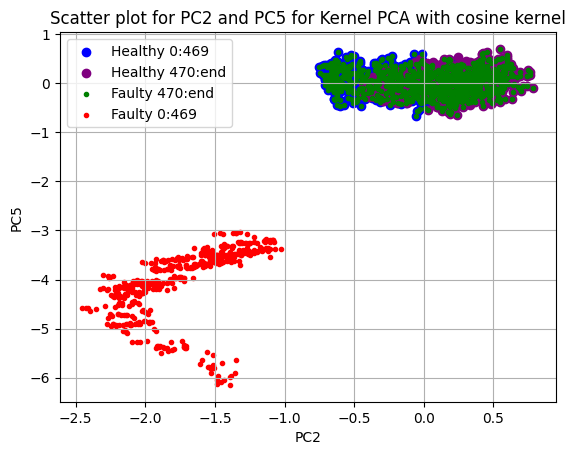

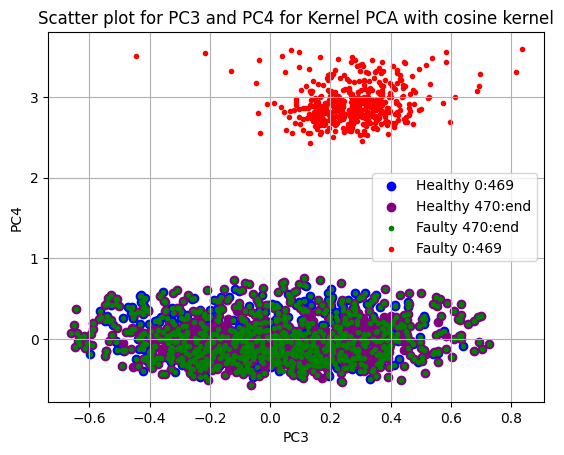

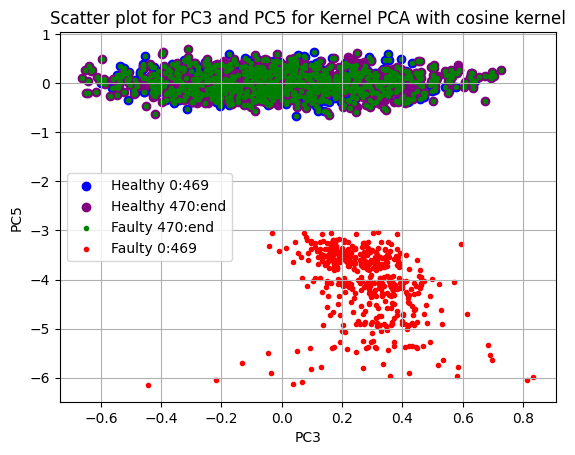

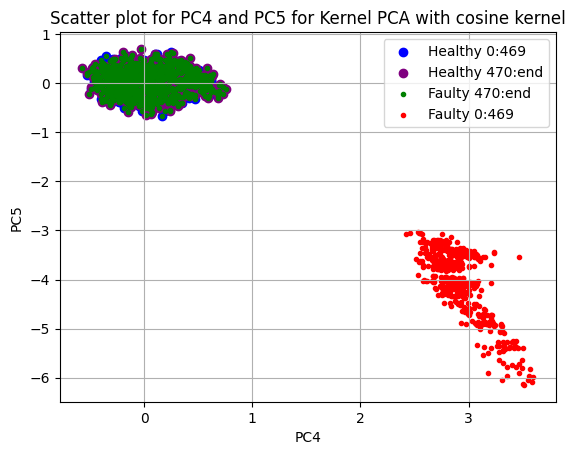

In [ ]:
#Using KernelPCA instead of normal PCA
from sklearn.decomposition import KernelPCA
kernelMods = ["poly", "rbf", "cosine"] #We've experimented with different kernels
for kmod in kernelMods:
  #Calculating the KernelPCA on healthy data
  kpca = KernelPCA(kernel=kmod, n_components=5, fit_inverse_transform=True)
  kpca.fit(z_score)
  kpca_data = kpca.transform(z_score)
  #Transforming the faulty data with the KernelPCA
  kpca_data_f = kpca.transform(z_score_f)

  #Calculating T2 and SPEx scores of the healthy data
  z_score_reconstructed = kpca.inverse_transform(kpca_data)
  spe = np.sum((z_score - z_score_reconstructed) ** 2, axis=1)
  cov_matrix = np.cov(kpca_data, rowvar=False)
  cov_matrix_inv = np.linalg.inv(cov_matrix)
  t2 = np.sum((kpca_data / np.sqrt(np.var(kpca_data, axis=0)))**2, axis=1)

  #Calculating T2 and SPEx scores of the faulty data
  z_score_reconstructed_f = kpca.inverse_transform(kpca_data_f)
  spe_f = np.sum((z_score_f - z_score_reconstructed_f) ** 2, axis=1)
  spe_f = spe_f.to_numpy()
  t2_f = np.sum((kpca_data_f / np.sqrt(np.var(kpca_data, axis=0)))**2, axis=1)

  #Plotting T2 control graph
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(t2, 'o', label='T2 score')
  plt.axhline(t2_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
  plt.axhline(t2_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
  plt.title(f"T2 Control Chart for Kernel {kmod} with Healthy data")
  plt.xlabel('Observation')
  plt.ylabel('T2 score')
  plt.legend()
  plt.grid(True)

  #Plotting T2 control graph with faulty data
  plt.subplot(1, 2, 2)
  plt.plot(np.delete(t2_f, 469), 'o', label='T2 score')
  plt.axhline(t2_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
  plt.axhline(t2_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
  plt.title(f"T2 Control Chart for Kernel {kmod} with Faulty data data")
  plt.xlabel('Observation')
  plt.ylabel('T2 score')
  plt.legend()
  plt.grid(True)
  plt.show()

  #Plotting SPEx control graph
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(spe, 'o', label='SPEx score')
  plt.axhline(spe_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
  plt.axhline(spe_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
  plt.title(f"SPEx Control Chart for Kernel {kmod} with Healthy data")
  plt.xlabel('Observation')
  plt.ylabel('SPEx score')
  plt.legend()
  plt.grid(True)

  #Plotting SPEx control graph with faulty data
  plt.subplot(1, 2, 2)
  plt.plot(np.delete(spe_f, 469), 'o', label='SPEx score')
  plt.axhline(spe_limit_2sd, color='r', linestyle='--', label='2 SD Limit')
  plt.axhline(spe_limit_3sd, color='orange', linestyle='--', label='3 SD Limit')
  plt.title(f"SPEx Control Chart for Kernel {kmod} with Faulty data")
  plt.xlabel('Observation')
  plt.ylabel('SPEx score')
  plt.legend()
  plt.grid(True)
  plt.show()

  #Plotting scatter plots for first 5 principal components with both healthy and faulty data
  for PC1 in range(5):
    for PC2 in range(4-PC1):

      plt.scatter(kpca_data[:469,PC1], kpca_data[:469,PC1+PC2+1], color="blue", label="Healthy 0:469")
      plt.scatter(kpca_data[470:,PC1], kpca_data[470:,PC1+PC2+1], color = "purple", label="Healthy 470:end")
      plt.scatter(kpca_data_f[470:,PC1], kpca_data_f[470:,PC1+PC2+1], marker=".", color='green', label="Faulty 470:end")
      plt.scatter(pca_projection[:469,PC1], pca_projection[:469,PC1+PC2+1], marker=".", color='red', label="Faulty 0:469")
      plt.xlabel(f"PC{PC1+1}")
      plt.ylabel(f"PC{PC1+PC2+2}")
      plt.grid(True)
      plt.legend()
      plt.title(f"Scatter plot for PC{PC1+1} and PC{PC1+PC2+2} for Kernel PCA with {kmod} kernel")
      plt.show()